# Problem Statement

In telecom industry, customers are able to choose from multiple service providers and actvelly switch from one operator to another. In this highly competitive market, the telecommunication industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain n existing one, customer retention has now become even more important than customer acquisition.

To reduce customer churn, telecom companies need to predict which customers are at high rish of churn. Here we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.


### Kindly note that Grid search and Randomized search takes lot of time for execution

In [736]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import datetime

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_recall_curve
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import precision_score, recall_score
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from sklearn import metrics
#import h2o

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier


In [737]:
#Read dataset from file
df=pd.read_csv('telecom_churn_data.csv')
df.shape

(99999, 226)

### Check dataset details

In [738]:
#Check columns and datatypes
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [739]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [740]:
len(df)

99999

# Data Analysis and Cleaning

In [741]:
#Checking null percentage columnwise
(df.isnull().sum()/len(df)*100)

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [742]:
#Viewing data details of various columns in dataset
for i in df.columns:
    coltype=str(df[i].dtype)
    print(i+' ('+coltype+') : ',end='')
    if(len(df[i].unique())<=35):
        print(round(df[i].value_counts()/len(df)*100),2)
        print('nulls: {}%'.format(round(df[i].isnull().sum()/len(df)*100),2))
        print('')
    elif(df[i].dtype=='int64' or df[i].dtype=='float64') and i != 'mobile_number':
        print('\tunique count = {}, range = [ {} - {} ], nulls = {}%'.format(len(df[i].unique()),df[i].min(),df[i].max(),round(df[i].isnull().sum()/len(df)*100,2)))
    else: 
        print('\tunique_count = {}, nulls = {}%'.format(len(df[i].unique()),round(df[i].isnull().sum()/len(df)*100,2)))

mobile_number (int64) : 	unique_count = 99999, nulls = 0.0%
circle_id (int64) : 109    100.0
Name: circle_id, dtype: float64 2
nulls: 0.0%

loc_og_t2o_mou (float64) : 0.0    99.0
Name: loc_og_t2o_mou, dtype: float64 2
nulls: 1.0%

std_og_t2o_mou (float64) : 0.0    99.0
Name: std_og_t2o_mou, dtype: float64 2
nulls: 1.0%

loc_ic_t2o_mou (float64) : 0.0    99.0
Name: loc_ic_t2o_mou, dtype: float64 2
nulls: 1.0%

last_date_of_month_6 (object) : 6/30/2014    100.0
Name: last_date_of_month_6, dtype: float64 2
nulls: 0.0%

last_date_of_month_7 (object) : 7/31/2014    99.0
Name: last_date_of_month_7, dtype: float64 2
nulls: 1.0%

last_date_of_month_8 (object) : 8/31/2014    99.0
Name: last_date_of_month_8, dtype: float64 2
nulls: 1.0%

last_date_of_month_9 (object) : 9/30/2014    98.0
Name: last_date_of_month_9, dtype: float64 2
nulls: 2.0%

arpu_6 (float64) : 	unique count = 85681, range = [ -2258.709 - 27731.088 ], nulls = 0.0%
arpu_7 (float64) : 	unique count = 85308, range = [ -2014.045 - 

loc_ic_mou_9 (float64) : 	unique count = 27698, range = [ 0.0 - 10796.29 ], nulls = 7.75%
std_ic_t2t_mou_6 (float64) : 	unique count = 6280, range = [ 0.0 - 5459.56 ], nulls = 3.94%
std_ic_t2t_mou_7 (float64) : 	unique count = 6482, range = [ 0.0 - 5800.93 ], nulls = 3.86%
std_ic_t2t_mou_8 (float64) : 	unique count = 6353, range = [ 0.0 - 4309.29 ], nulls = 5.38%
std_ic_t2t_mou_9 (float64) : 	unique count = 6158, range = [ 0.0 - 3819.83 ], nulls = 7.75%
std_ic_t2m_mou_6 (float64) : 	unique count = 9309, range = [ 0.0 - 5647.16 ], nulls = 3.94%
std_ic_t2m_mou_7 (float64) : 	unique count = 9465, range = [ 0.0 - 6141.88 ], nulls = 3.86%
std_ic_t2m_mou_8 (float64) : 	unique count = 9305, range = [ 0.0 - 5645.86 ], nulls = 5.38%
std_ic_t2m_mou_9 (float64) : 	unique count = 8934, range = [ 0.0 - 5689.76 ], nulls = 7.75%
std_ic_t2f_mou_6 (float64) : 	unique count = 3126, range = [ 0.0 - 1351.11 ], nulls = 3.94%
std_ic_t2f_mou_7 (float64) : 	unique count = 3210, range = [ 0.0 - 1136.08 ], null

total_rech_data_7 (float64) : 	unique count = 43, range = [ 1.0 - 54.0 ], nulls = 74.43%
total_rech_data_8 (float64) : 	unique count = 47, range = [ 1.0 - 60.0 ], nulls = 73.66%
total_rech_data_9 (float64) : 	unique count = 38, range = [ 1.0 - 84.0 ], nulls = 74.08%
max_rech_data_6 (float64) : 	unique count = 49, range = [ 1.0 - 1555.0 ], nulls = 74.85%
max_rech_data_7 (float64) : 	unique count = 49, range = [ 1.0 - 1555.0 ], nulls = 74.43%
max_rech_data_8 (float64) : 	unique count = 51, range = [ 1.0 - 1555.0 ], nulls = 73.66%
max_rech_data_9 (float64) : 	unique count = 51, range = [ 1.0 - 1555.0 ], nulls = 74.08%
count_rech_2g_6 (float64) : 1.0     11.0
0.0      6.0
2.0      3.0
3.0      1.0
4.0      1.0
5.0      1.0
6.0      0.0
7.0      0.0
8.0      0.0
9.0      0.0
10.0     0.0
11.0     0.0
12.0     0.0
13.0     0.0
14.0     0.0
15.0     0.0
17.0     0.0
16.0     0.0
18.0     0.0
19.0     0.0
20.0     0.0
22.0     0.0
21.0     0.0
24.0     0.0
25.0     0.0
28.0     0.0
34.0     0.


fb_user_6 (float64) : 1.0    23.0
0.0     2.0
Name: fb_user_6, dtype: float64 2
nulls: 75.0%

fb_user_7 (float64) : 1.0    23.0
0.0     2.0
Name: fb_user_7, dtype: float64 2
nulls: 74.0%

fb_user_8 (float64) : 1.0    23.0
0.0     3.0
Name: fb_user_8, dtype: float64 2
nulls: 74.0%

fb_user_9 (float64) : 1.0    22.0
0.0     4.0
Name: fb_user_9, dtype: float64 2
nulls: 74.0%

aon (int64) : 	unique count = 3489, range = [ 180 - 4337 ], nulls = 0.0%
aug_vbc_3g (float64) : 	unique count = 14676, range = [ 0.0 - 12916.22 ], nulls = 0.0%
jul_vbc_3g (float64) : 	unique count = 14162, range = [ 0.0 - 9165.6 ], nulls = 0.0%
jun_vbc_3g (float64) : 	unique count = 13312, range = [ 0.0 - 11166.21 ], nulls = 0.0%
sep_vbc_3g (float64) : 	unique count = 3720, range = [ 0.0 - 2618.57 ], nulls = 0.0%


#### Observation
- Few columns have lot many categories occuyping less than 0.1%
- Data usage columns see to have same number of nulls
- Recharge Date columns can be converted to how many days ago
- There are few columns with very low variance
- June and July month columns can be combined to goodphase data

### Converting lesser occupying rows to Others
- Few categorical columns have categories with percentage as low as <0.1%
- Hence combining these into a single category labelled as 'Others

In [743]:
 
#Combine categories less than 1% to a single 'Others' category
for i in df.columns[1:]:
    
    if(len(df[i].unique())<35) :
        
    #if(df[i].dtype=='object'):
        if( 'date' not in i and 'count' not in i and len(df[i].unique())>2):
            uniq=dict(df[i].value_counts()/len(df)*100)
            final = dict(filter(lambda e: e[1] < 1, uniq.items()))
            if(len(final)>1):
                keys=list(final.keys())
                values=[ 'Others' for i in range(0,len(final))]
                col_rep=dict(zip(keys,values))
                print('{}: {} = {}%'.format(i,keys,round(sum(final.values()),2)))
                print()
                df=df.replace({i:col_rep})


monthly_2g_6: [2, 3, 4] = 0.6%

monthly_2g_7: [2, 3, 4, 5] = 0.71%

monthly_2g_8: [2, 3, 4, 5] = 0.63%

monthly_2g_9: [2, 3, 4] = 0.57%

sachet_2g_6: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 16, 18, 19, 22, 20, 21, 24, 25, 39, 27, 28, 30, 32, 34, 42] = 3.5%

sachet_2g_8: [5, 6, 7, 8, 9, 10, 11, 12, 14, 13, 15, 16, 18, 19, 17, 20, 24, 22, 25, 21, 29, 27, 32, 34, 23, 26, 31, 33, 44] = 3.23%

sachet_2g_9: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 16, 22, 17, 21, 30, 32, 35, 19, 20, 23, 24, 25, 27, 33, 40] = 2.43%

monthly_3g_6: [2, 3, 4, 5, 6, 7, 8, 11, 9, 14] = 1.24%

monthly_3g_7: [3, 4, 5, 6, 7, 8, 9, 11, 16, 14, 12, 10] = 0.39%

monthly_3g_8: [3, 4, 5, 6, 7, 9, 8, 10, 16] = 0.42%

monthly_3g_9: [3, 4, 5, 6, 8, 7, 11, 9] = 0.39%

sachet_3g_6: [2, 3, 4, 5, 6, 7, 9, 8, 11, 10, 15, 12, 14, 19, 13, 18, 22, 23, 16, 17, 29, 28, 21] = 1.19%

sachet_3g_7: [2, 3, 4, 5, 6, 7, 8, 9, 11, 10, 12, 15, 14, 13, 18, 19, 17, 20, 22, 16, 21, 24, 33, 31, 35] = 1.32%

sachet_3g_8: [2, 3, 4, 5, 6, 7

## Converting date column to number of days ago
- Convert monthwise how many days ago recharge was done w.r.t end of month
- Convert to how many days ago recharge was done w.r.t 31 August 2014
- Drop june.july,august month columns, retain till 8th month and for 9th month for later analysis

In [744]:
#Fill nulls in date columsn with last day of month to calculate days ago
#Convert date columns to datetime
date_list=['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',
           'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9',
           'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
last_day=['6/30/2014','7/31/2014','8/31/2014','9/30/2014']
j=0
for i in enumerate(date_list):
    df[i[1]]=df[i[1]].fillna(value=last_day[j],axis=0)
    df[i[1]]=pd.to_datetime(df[i[1]])
    if(j==3):
        j=0
    else:
        j=j+1
     


In [745]:
#Calculate how many days ago from last day of month for each month
df['Days_last_rech_data_since_last_dom_6']=df['last_date_of_month_6']-df['date_of_last_rech_data_6']
df['Days_last_rech_data_since_last_dom_7']=df['last_date_of_month_7']-df['date_of_last_rech_data_7']
df['Days_last_rech_data_since_last_dom_8']=df['last_date_of_month_8']-df['date_of_last_rech_data_8']
df['Days_last_rech_data_since_last_dom_9']=df['last_date_of_month_9']-df['date_of_last_rech_data_9']

df['Days_last_rech_since_last_dom_6']=df['last_date_of_month_6']-df['date_of_last_rech_6']
df['Days_last_rech_since_last_dom_7']=df['last_date_of_month_7']-df['date_of_last_rech_7']
df['Days_last_rech_since_last_dom_8']=df['last_date_of_month_8']-df['date_of_last_rech_8']
df['Days_last_rech_since_last_dom_9']=df['last_date_of_month_9']-df['date_of_last_rech_9']



### Convert below to single column from months 6-8
- Days_last_rech_data_since_last_dom_{m}
- last_day_rech_amt_{m}
- Days_last_rech_since_last_dom_{m} 

In [746]:
#Copy 8th month data as it is to new column
df[['Days_last_rech_till_8','last_day_rech_amt_till_8']]=df[['Days_last_rech_since_last_dom_8','last_day_rch_amt_8']].copy()
df['Days_last_rech_data_till_8']=df['Days_last_rech_data_since_last_dom_8'].copy()

In [747]:
#Replacing 0 days with previous month data 7
df['last_day_rech_amt_till_8'][df['Days_last_rech_till_8']=='0 days']=df['last_day_rch_amt_7'][df['Days_last_rech_till_8']=='0 days']
df['Days_last_rech_till_8'][df['Days_last_rech_till_8']=='0 days']=(df['Days_last_rech_since_last_dom_7'][df['Days_last_rech_till_8']=='0 days']).apply(lambda x:x+datetime.timedelta(days=31) if(x.days!=0) else  x)

df['Days_last_rech_data_till_8'][df['Days_last_rech_data_till_8']=='0 days']=(df['Days_last_rech_data_since_last_dom_7'][df['Days_last_rech_data_till_8']=='0 days']).apply(lambda x:x+datetime.timedelta(days=31) if(x.days!=0) else  x )
#(df['Days_last_rech_data_since_last_dom_7'][df['Days_last_rech_data_till_8']=='0 days']).apply(lambda x:x+datetime.timedelta(days=31) if(x.days!=0) else  x )

In [748]:
#Replacing 0 days with previous month data 6
df['last_day_rech_amt_till_8'][df['Days_last_rech_till_8']=='0 days']=df['last_day_rch_amt_6'][df['Days_last_rech_till_8']=='0 days']
df['Days_last_rech_till_8'][df['Days_last_rech_till_8']=='0 days']=df['Days_last_rech_since_last_dom_6'][df['Days_last_rech_till_8']=='0 days'].apply(lambda x:x+datetime.timedelta(days=62) if(x.days!=0) else  x)
df['Days_last_rech_data_till_8'][df['Days_last_rech_data_till_8']=='0 days']=df['Days_last_rech_data_since_last_dom_6'][df['Days_last_rech_data_till_8']=='0 days'].apply(lambda x:x+datetime.timedelta(days=62) if(x.days!=0) else  x)

In [749]:
#Dropping irrelevant date columns retaining only till 8 and for month 9
df=df.drop(columns=['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',
           'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9',
           'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
            'Days_last_rech_since_last_dom_6','Days_last_rech_since_last_dom_7','Days_last_rech_since_last_dom_8',
           'Days_last_rech_data_since_last_dom_6','Days_last_rech_data_since_last_dom_7','Days_last_rech_data_since_last_dom_8',
            'last_day_rch_amt_8','last_day_rch_amt_7','last_day_rch_amt_6'],axis=1)

In [750]:
# Converting timedelta to days as int for till 8
df['Days_last_rech_till_8']=df['Days_last_rech_till_8'].astype('object').apply(lambda x:x.days)
df['Days_last_rech_data_till_8']=df['Days_last_rech_data_till_8'].astype('object').apply(lambda x:x.days)

In [751]:
# Converting timedelta to days as int for month 9
df['Days_last_rech_since_last_dom_9']=df['Days_last_rech_since_last_dom_9'].astype('object').apply(lambda x:x.days)
df['Days_last_rech_data_since_last_dom_9']=df['Days_last_rech_data_since_last_dom_9'].astype('object').apply(lambda x:x.days)

## Imputation of null columns

### Imputation for Data Usage details columns
- If all the Data columns are null for a row we can assume that user has not enabled data usage 
- otherwise if some are null, means no recharge/not subscribed
- Accordingly do imputation

In [752]:
#Checking null values for all Data columns 
df1=df['fb_user_6'].isnull() & df['fb_user_7'].isnull() & df['fb_user_8'].isnull() & df['fb_user_9'].isnull()
print('Column_Name:\tNullCntInColumn\t\tNullCnt_with_AllMonthsAsNull')
print('************\t***************\t\t*****************************')
data_list=[
           'fb_user_6','fb_user_7','fb_user_8','fb_user_9',
           'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9',
           'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
           'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
           'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9',
           'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9',
           'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9',
           'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
           'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
cnt=0
for i in enumerate(data_list):
    if(i[0]%4==0 and i[0]!=0):
        cnt=cnt+1
    
    c=4*cnt
    df2=df1&df[data_list[c]].isnull()&df[data_list[c+1]].isnull()&df[data_list[c+2]].isnull()&df[data_list[c+3]].isnull()
    print('{}:\t{}\t\t\t{}'.format(i[1],df[i[1]].isnull().sum(),df[i[1]][df2].isnull().sum()))
    

Column_Name:	NullCntInColumn		NullCnt_with_AllMonthsAsNull
************	***************		*****************************
fb_user_6:	74846			58806
fb_user_7:	74428			58806
fb_user_8:	73660			58806
fb_user_9:	74077			58806
count_rech_3g_6:	74846			58806
count_rech_3g_7:	74428			58806
count_rech_3g_8:	73660			58806
count_rech_3g_9:	74077			58806
count_rech_2g_6:	74846			58806
count_rech_2g_7:	74428			58806
count_rech_2g_8:	73660			58806
count_rech_2g_9:	74077			58806
total_rech_data_6:	74846			58806
total_rech_data_7:	74428			58806
total_rech_data_8:	73660			58806
total_rech_data_9:	74077			58806
max_rech_data_6:	74846			58806
max_rech_data_7:	74428			58806
max_rech_data_8:	73660			58806
max_rech_data_9:	74077			58806
arpu_3g_6:	74846			58806
arpu_3g_7:	74428			58806
arpu_3g_8:	73660			58806
arpu_3g_9:	74077			58806
arpu_2g_6:	74846			58806
arpu_2g_7:	74428			58806
arpu_2g_8:	73660			58806
arpu_2g_9:	74077			58806
night_pck_user_6:	74846			58806
night_pck_user_7:	74428			58806
night_pck_use

### Replace null values in Data Usage columns
- Replace null values where all the months have null with DataNotInUse in categorical Data Columns 
- And check if all months columns for particular variable is null or not and accordinly impute
- Replace null vaues with 0 for numerical columns(whether no data in use or no subscription, recharge

In [753]:
#col_names=['count_rech_3g','']
num_col=['count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9',
         'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
         'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9',
         'arpu_3g_6' ,'arpu_3g_7','arpu_3g_8','arpu_3g_9',
         'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9',
         'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9',
         'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']
for i in data_list:
    if i not in num_col:
        df[i][df1]=df[i][df1].fillna(value='DataNotInUse',axis=0) 
        df[i]=df[i].fillna(value='NotSubscribed',axis=0)
    else:
        df[i]=df[i].fillna(value=0,axis=0)



In [754]:
#Rechecking nulls after imputation
df[data_list].isnull().sum()/len(df)

fb_user_6             0.0
fb_user_7             0.0
fb_user_8             0.0
fb_user_9             0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
count_rech_3g_9       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_2g_9       0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
arpu_3g_6             0.0
arpu_3g_7             0.0
arpu_3g_8             0.0
arpu_3g_9             0.0
arpu_2g_6             0.0
arpu_2g_7             0.0
arpu_2g_8             0.0
arpu_2g_9             0.0
night_pck_user_6      0.0
night_pck_user_7      0.0
night_pck_user_8      0.0
night_pck_user_9      0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
dtype: float64

### Imputation of other null columns
- Impute categorical with mode
- Impute numerical with median

In [755]:
null_col=[]
for col,val in dict(df.isnull().sum()/len(df)).items():
    if(val>0):
        null_col.append(col)

In [756]:
null_col

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_t2

In [757]:
# imp=IterativeImputer(max_iter=2,random_state=0)
# imp.fit_transform(df[null_col])

In [758]:
# Imputing categorical columns with mode and numerical with median
for i in null_col:
    if(df[i].dtype=='object'):
        df[i]=df[i].fillna(df[i].mode())
    else:
        df[i]=df[i].fillna(df[i].median())

In [759]:
df[null_col].isnull().sum()/len(df)

loc_og_t2o_mou      0.0
std_og_t2o_mou      0.0
loc_ic_t2o_mou      0.0
onnet_mou_6         0.0
onnet_mou_7         0.0
onnet_mou_8         0.0
onnet_mou_9         0.0
offnet_mou_6        0.0
offnet_mou_7        0.0
offnet_mou_8        0.0
offnet_mou_9        0.0
roam_ic_mou_6       0.0
roam_ic_mou_7       0.0
roam_ic_mou_8       0.0
roam_ic_mou_9       0.0
roam_og_mou_6       0.0
roam_og_mou_7       0.0
roam_og_mou_8       0.0
roam_og_mou_9       0.0
loc_og_t2t_mou_6    0.0
loc_og_t2t_mou_7    0.0
loc_og_t2t_mou_8    0.0
loc_og_t2t_mou_9    0.0
loc_og_t2m_mou_6    0.0
loc_og_t2m_mou_7    0.0
loc_og_t2m_mou_8    0.0
loc_og_t2m_mou_9    0.0
loc_og_t2f_mou_6    0.0
loc_og_t2f_mou_7    0.0
loc_og_t2f_mou_8    0.0
loc_og_t2f_mou_9    0.0
loc_og_t2c_mou_6    0.0
loc_og_t2c_mou_7    0.0
loc_og_t2c_mou_8    0.0
loc_og_t2c_mou_9    0.0
loc_og_mou_6        0.0
loc_og_mou_7        0.0
loc_og_mou_8        0.0
loc_og_mou_9        0.0
std_og_t2t_mou_6    0.0
std_og_t2t_mou_7    0.0
std_og_t2t_mou_8

# Finding top value customers
- We find the total usage of data and calls for good phase months,i.e, 6 and 7
- Based on total usage, customers having usage above 70th percentile are retained as top value customers

In [760]:
#Find total of data and call recharge amount in June month
df['total_rech_amt_with_data_6']=(df['total_rech_data_6']+df['total_rech_amt_6'])

In [761]:
#Find total of data and call recharge amount in July month
df['total_rech_amt_with_data_7']=(df['total_rech_data_7']+df['total_rech_amt_7'])

In [762]:
#Find average recharge amount for June and July month
df['avg_rech_amt_good_phase']=(df['total_rech_amt_with_data_7']+df['total_rech_amt_with_data_6'])/2

In [763]:
#Keep copy before truncating
df_orig=df.copy()

In [764]:
#Keep only 70percentile recharge amount customer
df= df.loc[df['avg_rech_amt_good_phase'] > df['avg_rech_amt_good_phase'].describe(percentiles = [.7])['70%']]

In [765]:
#Count after retaining top vaalue customers
print('Count after retaining top value customers: {}'.format(len(df)))
print('% of top value customers out of total: {}'.format(round(len(df)/99999,2)))

Count after retaining top value customers: 29991
% of top value customers out of total: 0.3


In [766]:
#Dropping columns created for calculation
df.drop(columns=['avg_rech_amt_good_phase','total_rech_amt_with_data_7','total_rech_amt_with_data_6'],axis=1,inplace=True)

In [767]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

      arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
7   1069.180  1349.850  3171.480  500.000        57.84        54.68   
8    378.721   492.223   137.362  166.787       413.69       351.03   
13   492.846   205.671   593.260  322.732       501.76       108.39   
16   430.975   299.869   187.894  206.490        50.51        74.01   
17   690.008    18.980    25.499  257.583      1185.91         9.28   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7         52.29        29.84        453.43        567.16        325.91   
8         35.08        33.46         94.66         80.63        136.48   
13       534.24       244.81        413.31        119.28        482.46   
16        70.61        31.34        296.29        229.74        162.76   
17         7.79       558.51         61.64          0.00          5.54   

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
7          87.29          16.23          33.49          31.64           0.00   
8         108.71           0.00           0.00           0.00           0.00   
13        214.06          23.53         144.24          72.11         136.78   
16        224.39           0.00           2.83           0.00           0.00   
17         87.89           0.00           4.76           4.81           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7           23.74          12.59          38.06           0.00   
8            0.00           0.00           0.00           0.00   
13           7.98          35.26           1.44          12.78   
16           0.00          17.74           0.00           0.00   
17           0.00           8.46          13.34          17.98   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28             11.26   
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28             39.12   
8              80.96             70.58             50.54             34.58   
13            151.13             47.28            294.46            108.24   
16            273.29            145.99            128.28            201.49   
17             58.54              0.00              0.00              9.38   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23              0.00   
8               0.00              0.00              0.00              0.00   
13              4.54              0.00             23.51              5.29   
16              0.00              4.48             10.26              4.66   
17              0.00              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
7                0.0               0.0              0.00               0.0   
8                0.0               0.0              7.15               0.0   
13               0.0               0.0              0.49               0.0   
16               0.0               0.0              0.

# Finding Churn customers from Sep month data
- Calculate total of call and data usage
- If total usage is 0 then churn is 'yes' (represented by 1) else 'no' (represented by 0)

In [768]:
#Total call usage in mou
df['total_mou_9']=(df['total_og_mou_9']+df['total_ic_mou_9'])

In [769]:
#Total data volume usage in mb
df['total_vol_mb_9']=(df['vol_3g_mb_9']+df['vol_2g_mb_9'])

In [770]:
#Calculate sum of call and data usage
df['Churn_val']=df['total_vol_mb_9']+df['total_mou_9']

In [771]:
#Encode Churn_val to 0=1, if sum=0 else Churn_val=0 
df['Churn_val']=df['Churn_val'].apply(lambda x:1 if x==0 else 0)

In [772]:
#For creating model, Find columns of 9th month and drop
drop_col=[]
for i in df.columns:
    if '_9' in i:
        drop_col.append(i)
print(drop_col)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'Days_last_rech_data_since_last_dom_9', 'Days_last_rech_since_last_dom_9', 'total_mou_9', 'total_vo

In [773]:
df.drop(columns=drop_col,axis=1,inplace=True)

### Convert month data to good phase and badphase
- Months 6 and 7 will be combined into one single goodphase column
- Replace columns with average of June and July for normal numerical columns 
- Replace with max of the two columns for max columns
- Rename Aug month data as badphase


In [774]:
#Converting vbc columns to 6,7,8
cols={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'}
df.rename(columns=cols,inplace=True)

In [775]:
for col1 in df.columns:
    #print('{}: {}'.format(col1,'_6' in col1 ))
    if('_6' in col1 and df[col1].dtype!='object'):
        text=col1[:-2]
        #print(text)
        new_col=text+'_goodphase'
        col2=text+'_7'
        if('max' in i):
            df[new_col]=df[[col1, col2]].max(axis=1)
        else:
            df[new_col]=(df[col1]+df[col2])/2
            df.drop(columns=[col1,col2],axis=1,inplace=True)
    elif('_6' in col1 and df[col1].dtype=='object'):
        print(df[col1].value_counts())

DataNotInUse     13196
0.0              11118
NotSubscribed     5363
1.0                314
Name: night_pck_user_6, dtype: int64
0         26661
1          2951
Others      379
Name: monthly_2g_6, dtype: int64
0         24723
1          2364
Others     1284
2          1012
3           608
Name: sachet_2g_6, dtype: int64
0         26408
1          2544
Others     1039
Name: monthly_3g_6, dtype: int64
0         28002
1          1313
Others      676
Name: sachet_3g_6, dtype: int64
DataNotInUse     13196
1.0              10260
NotSubscribed     5363
0.0               1172
Name: fb_user_6, dtype: int64


In [776]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

      arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
7   3171.480        52.29        325.91          31.64          38.06   
8    137.362        35.08        136.48           0.00           0.00   
13   593.260       534.24        482.46          72.11           1.44   
16   187.894        70.61        162.76           0.00           0.00   
17    25.499         7.79          5.54           4.81          13.34   

    loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
7              40.28            162.28             53.23              0.00   
8              12.49             50.54              0.00              7.15   
13             36.01            294.46             23.51              0.49   
16             67.38            128.28             10.26              0.00   
17              0.00              0.00              0.00              0.00   

    loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
7         255.79             12.01             49.14             16.68   
8          63.04             22.58             75.69              0.00   
13        353.99            498.23            156.94              0.00   
16        205.93              3.23             18.29              0.00   
17          0.00              0.00              0.00              0.00   

    std_og_t2c_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
7                0.0         77.84         10.01          6.50          0.0   
8                0.0         98.28          0.00         10.23          0.0   
13               0.0        655.18          1.29          4.78          0.0   
16               0.0         21.53          0.00          5.91          0.0   
17               0.0          0.00          0.00          0.00          0.0   

    total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  \
7           350.16             27.31            121.19             39.53   
8           171.56              0.31             15.48              0.00   
13         1015.26             52.58            195.18              7.49   
16          233.38             28.89            150.16             32.71   
17            0.00              0.00              0.00              0.00   

    loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
7         188.04             30.39            141.33             22.21   
8          15.79              0.10              0.65              0.00   
13        255.26            154.58            317.91              1.91   
16        211.78              6.33             73.93              2.18   
17          0.00              0.00              0.00              0.00   

    std_ic_t2o_mou_8  std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  \
7                0.0        193.94          428.74           0.0   
8                0.0          0.75           16.54           0.0   
13               0.0        474.41         1144.53           0.0   
16               0.0         82.44          294.46           0.0   
17               0.0          0.00            0.00           0.0   

    isd_ic_mou_8  ic_others_8  total_rech_num_8  total_rech_amt_8  \
7          31.59        15.14                 7              3638   
8           0.00         0.00                14               120   
13        393.39        21.44                11               717   
16          0.23         0.00                 2               160   
17          0.00         0.00          

In [777]:
rename_dict={}
for col1 in df.columns:
    #print('{}: {}'.format(col1,'_6' in col1 ))
    if('_8' in col1 and df[col1].dtype!='object' and 'till_8' not in col1):
        text=col1[:-2]
        #print(text)
        new_col=text+'_badphase'
        #col2=text+'_7'
        #df[new_col]=(df[col1]+df[col2])/2
        rename_dict[col1]=new_col
    df.rename(columns=rename_dict,inplace=True)

In [778]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

    arpu_badphase  onnet_mou_badphase  offnet_mou_badphase  \
7        3171.480               52.29               325.91   
8         137.362               35.08               136.48   
13        593.260              534.24               482.46   
16        187.894               70.61               162.76   
17         25.499                7.79                 5.54   

    roam_ic_mou_badphase  roam_og_mou_badphase  loc_og_t2t_mou_badphase  \
7                  31.64                 38.06                    40.28   
8                   0.00                  0.00                    12.49   
13                 72.11                  1.44                    36.01   
16                  0.00                  0.00                    67.38   
17                  4.81                 13.34                     0.00   

    loc_og_t2m_mou_badphase  loc_og_t2f_mou_badphase  loc_og_t2c_mou_badphase  \
7                    162.28                    53.23                     0.00   
8                     50.54                     0.00                     7.15   
13                   294.46                    23.51                     0.49   
16                   128.28                    10.26                     0.00   
17                     0.00                     0.00                     0.00   

    loc_og_mou_badphase  std_og_t2t_mou_badphase  std_og_t2m_mou_badphase  \
7                255.79                    12.01                    49.14   
8                 63.04                    22.58                    75.69   
13               353.99                   498.23                   156.94   
16               205.93                     3.23                    18.29   
17                 0.00                     0.00                     0.00   

    std_og_t2f_mou_badphase  std_og_t2c_mou_badphase  std_og_mou_badphase  \
7                     16.68                      0.0                77.84   
8                      0.00                      0.0                98.28   
13                     0.00                      0.0               655.18   
16                     0.00                      0.0                21.53   
17                     0.00                      0.0                 0.00   

    isd_og_mou_badphase  spl_og_mou_badphase  og_others_badphase  \
7                 10.01                 6.50                 0.0   
8                  0.00                10.23                 0.0   
13                 1.29                 4.78                 0.0   
16                 0.00                 5.91                 0.0   
17                 0.00                 0.00                 0.0   

    total_og_mou_badphase  loc_ic_t2t_mou_badphase  loc_ic_t2m_mou_badphase  \
7                  350.16                    27.31                   121.19   
8                  171.56                     0.31                    15.48   
13                1015.26                    52.58                   195.18   
16                 233.38                    28.89                   150.16   
17                   0.00                     0.00                     0.00   

    loc_ic_t2f_mou_badphase  loc_ic_mou_badphase  std_ic_t2t_mou_badphase  \
7                     39.53               188.04                    30.39   
8                      0.00                15.79                     0.10   
13                     7.49               255.26                   154.58   
16                    32.71               211.78                     6.33   
17               

### Remove columns with 10% or less variance

In [779]:
#Find columns with 95% or more same data
drop_list=[]
for i in df.columns:
    if(i!='Id'):
        #print(list(df[i].value_counts())[0])
        if((round(list(df[i].value_counts())[0]/len(df)*100),2)[0]>=90):
            drop_list.append(i)
drop_list.remove('Churn_val')
print(drop_list)


['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_badphase', 'isd_og_mou_badphase', 'og_others_badphase', 'std_ic_t2o_mou_badphase', 'spl_ic_mou_badphase', 'monthly_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sep_vbc_3g', 'std_og_t2c_mou_goodphase', 'std_ic_t2o_mou_goodphase']


In [780]:
df.drop(columns=drop_list,axis=1,inplace=True)

### Outlier Analysis

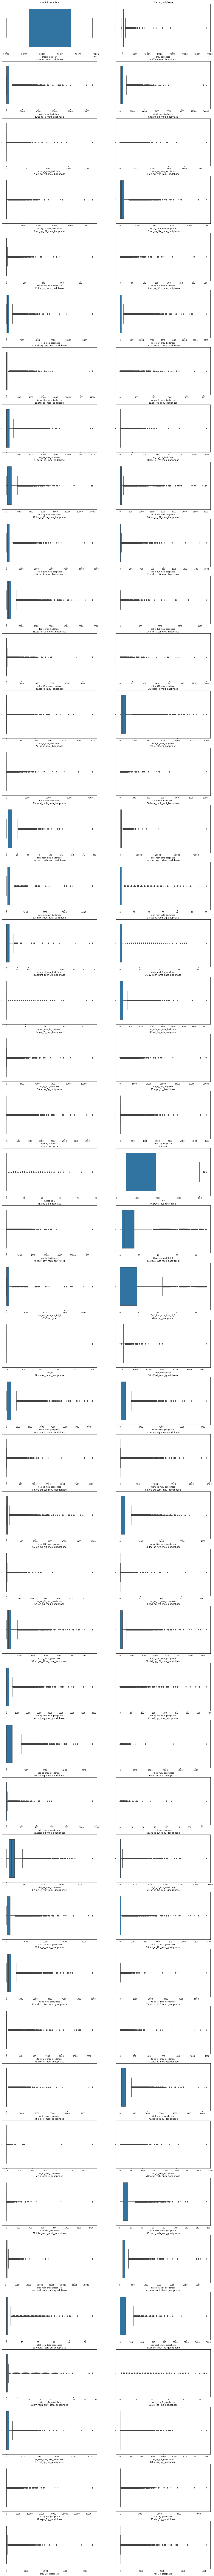

In [781]:
#Look at outliers
plt.figure(figsize=(20,400))
j=1

for i in df.columns:
    
    if(df[i].dtype=='int64' or df[i].dtype=='float64'):
        
        plt.subplot(140//2+1,2,j)
        sns.boxplot(x=df[i])
        plt.title('{}.{}'.format(j,i))
        j=j+1
    


In [782]:
cap_dict={'arpu_badphase':10000,'onnet_mou_badphase':8000,'offnet_mou_badphase':10000,'roam_ic_mou_badphase':2000,
          'roam_og_mou_badphase':3000,'loc_og_t2t_mou_badphase':4000,'loc_og_t2m_mou_badphase':3000,
          'loc_og_t2f_mou_badphase':500,'loc_og_t2c_mou_badphase':200,'loc_og_mou_badphase':6000,
          'std_og_t2t_mou_badphase':6000,'std_og_t2m_mou_badphase':8000,'std_og_t2f_mou_badphase':300,
          'std_og_mou_badphase':10000,'spl_og_mou_badphase':700,'total_og_mou_badphase':10000,
          'loc_ic_t2t_mou_badphase':3000,'loc_ic_t2m_mou_badphase':4000,'loc_ic_t2f_mou_badphase':1000,
          'loc_ic_mou_badphase':5000,'std_ic_t2t_mou_badphase':2000,'std_ic_t2m_mou_badphase':3000,
          'std_ic_t2f_mou_badphase':800,'std_ic_mou_badphase':3500,'total_ic_mou_badphase':5000,
          'isd_ic_mou_badphase':2000,'ic_others_badphase':800,'total_rech_num_badphase':150,
          'total_rech_amt_badphase':20000,'max_rech_amt_badphase':2500,'max_rech_data_badphase':1000,
          'count_rech_2g_badphase':40,'count_rech_3g_badphase':30,'av_rech_amt_data_badphase':3000,
          'vol_2g_mb_badphase':6000,'vol_3g_mb_badphase':20000,'arpu_3g_badphase':2500,'arpu_2g_badphase':2500,
          'sachet_2g_7':40,'vbc_3g_badphase':8000,'last_day_rech_amt_till_8':3200,'arpu_goodphase':10000,
          'onnet_mou_goodphase':6000,'offnet_mou_goodphase':6000,'roam_ic_mou_goodphase':1700,
          'roam_og_mou_goodphase':2000,'loc_og_t2t_mou_goodphase':5000,'loc_og_t2m_mou_goodphase':3500,
          'loc_og_t2f_mou_goodphase':600,'loc_og_t2c_mou_goodphase':250,'std_og_t2t_mou_goodphase':6000,
          'std_og_t2m_mou_goodphase':6000,'std_og_mou_goodphase':8000,'isd_og_mou_goodphase':2000,
          'spl_og_mou_goodphase':800,'total_og_mou_goodphase':8000,'og_others_goodphase':75,
          'loc_ic_t2t_mou_goodphase':4000,'loc_ic_t2m_mou_goodphase':3500,'loc_ic_mou_goodphase':5000,
          'std_ic_t2t_mou_goodphase':3000,'std_ic_t2f_mou_goodphase':800,'std_ic_mou_goodphase':4000,
          'total_ic_mou_goodphase':5000,'spl_ic_mou_goodphase':5,'isd_ic_mou_goodphase':2000,'ic_others_goodphase':600}

In [783]:
#df1=df.copy()
# df=df1.copy()
# #df.head()

In [784]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29991 entries, 7 to 99997
Data columns (total 103 columns):
mobile_number                 int64
arpu_badphase                 float64
onnet_mou_badphase            float64
offnet_mou_badphase           float64
roam_ic_mou_badphase          float64
roam_og_mou_badphase          float64
loc_og_t2t_mou_badphase       float64
loc_og_t2m_mou_badphase       float64
loc_og_t2f_mou_badphase       float64
loc_og_t2c_mou_badphase       float64
loc_og_mou_badphase           float64
std_og_t2t_mou_badphase       float64
std_og_t2m_mou_badphase       float64
std_og_t2f_mou_badphase       float64
std_og_mou_badphase           float64
spl_og_mou_badphase           float64
total_og_mou_badphase         float64
loc_ic_t2t_mou_badphase       float64
loc_ic_t2m_mou_badphase       float64
loc_ic_t2f_mou_badphase       float64
loc_ic_mou_badphase           float64
std_ic_t2t_mou_badphase       float64
std_ic_t2m_mou_badphase       float64
std_ic_t2f_mou_bad

In [785]:
#Capping outliers
for i in cap_dict.keys():
    print(i,df[df[i]<cap_dict[i]][i].max(),len(df[df[i]>cap_dict[i]][i]))
    df[i]=df[i].apply(lambda x: df[df[i]<cap_dict[i]][i].max() if x>cap_dict[i] else x )

arpu_badphase 8989.681999999999 5
onnet_mou_badphase 7470.36 3
offnet_mou_badphase 7857.78 2
roam_ic_mou_badphase 1968.49 5
roam_og_mou_badphase 2939.86 2
loc_og_t2t_mou_badphase 3973.79 8
loc_og_t2m_mou_badphase 2945.58 6
loc_og_t2f_mou_badphase 428.01 6
loc_og_t2c_mou_badphase 180.04 5
loc_og_mou_badphase 5533.81 4
std_og_t2t_mou_badphase 5911.36 6
std_og_t2m_mou_badphase 7508.93 2
std_og_t2f_mou_badphase 289.46 7
std_og_mou_badphase 8593.64 2
spl_og_mou_badphase 593.36 3
total_og_mou_badphase 8728.33 4
loc_ic_t2t_mou_badphase 2880.54 10
loc_ic_t2m_mou_badphase 3645.51 3
loc_ic_t2f_mou_badphase 963.34 5
loc_ic_mou_badphase 4652.79 2
std_ic_t2t_mou_badphase 1737.26 7
std_ic_t2m_mou_badphase 2948.74 2
std_ic_t2f_mou_badphase 781.08 4
std_ic_mou_badphase 3455.71 4
total_ic_mou_badphase 4800.41 4
isd_ic_mou_badphase 1824.19 5
ic_others_badphase 694.53 1
total_rech_num_badphase 138 1
total_rech_amt_badphase 18914 2
max_rech_amt_badphase 2199 17
max_rech_data_badphase 951.0 9
count_rech_2g

### Churn v/s numerical columns

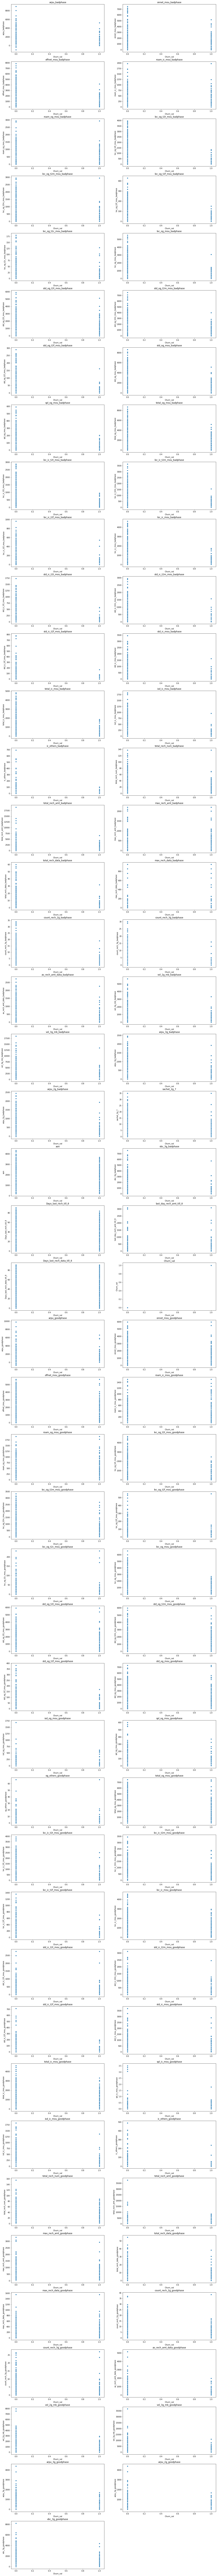

In [786]:
plt.figure(figsize=(20,400))
j=1
#df_cat= df.select_dtypes(include=['object'])
for i in df.columns[1:]:
    
    if(df[i].dtype=='float64' or df[i].dtype=='int64'):
        plt.subplot((140//2),2,j)
        sns.scatterplot(x=df['Churn_val'],y=df[i])
        plt.title(i)
        j=j+1

##### Observation
- Generally values are lower for churned customers for most of the paramters
- For Days_last rech_till_8 and the same for data have no particular pattern 

<Figure size 1440x4320 with 0 Axes>

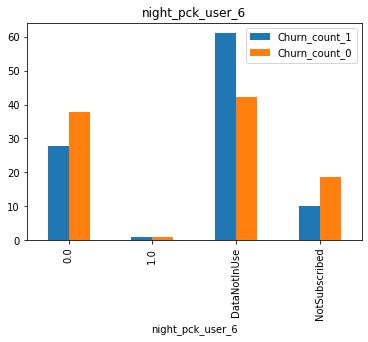

<Figure size 1440x4320 with 0 Axes>

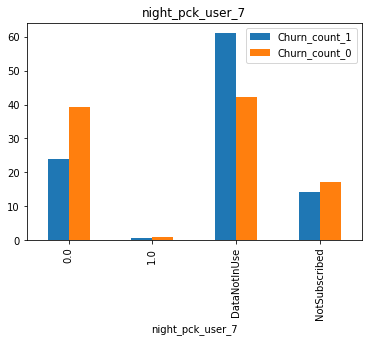

<Figure size 1440x4320 with 0 Axes>

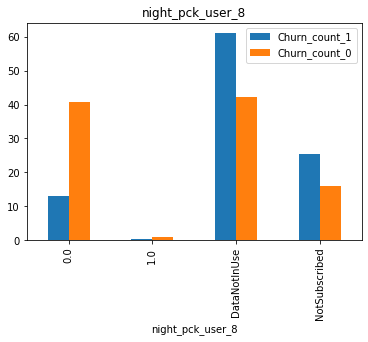

<Figure size 1440x4320 with 0 Axes>

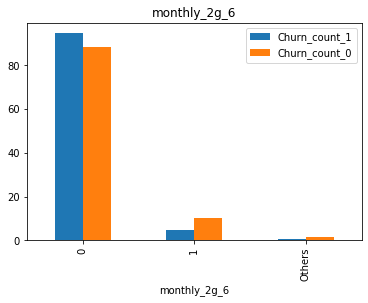

<Figure size 1440x4320 with 0 Axes>

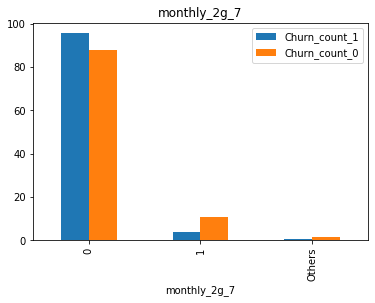

<Figure size 1440x4320 with 0 Axes>

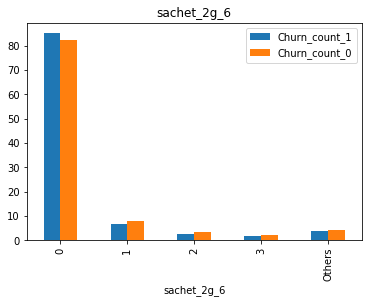

<Figure size 1440x4320 with 0 Axes>

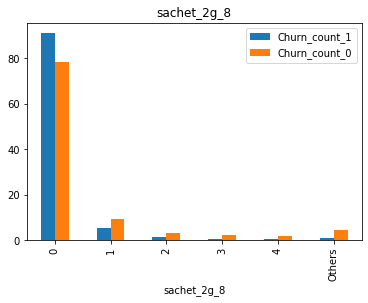

<Figure size 1440x4320 with 0 Axes>

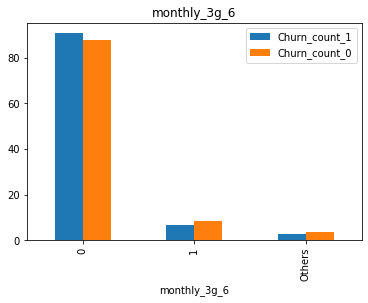

<Figure size 1440x4320 with 0 Axes>

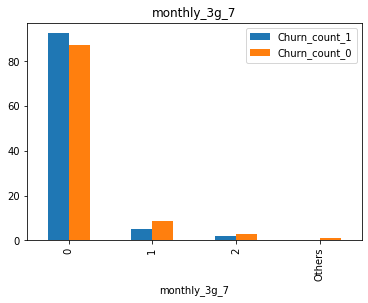

<Figure size 1440x4320 with 0 Axes>

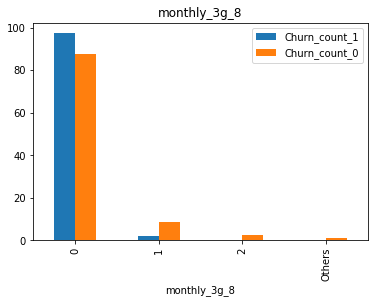

<Figure size 1440x4320 with 0 Axes>

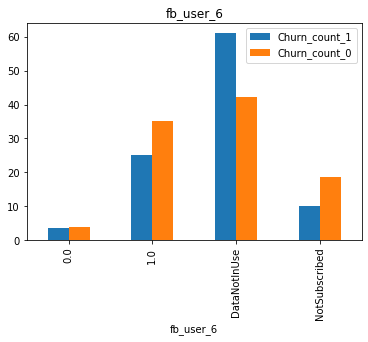

<Figure size 1440x4320 with 0 Axes>

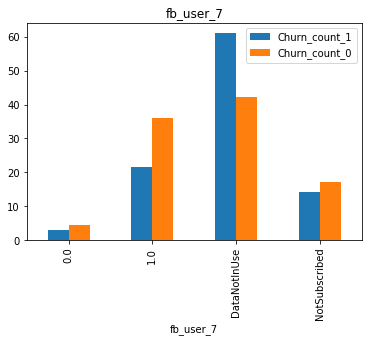

<Figure size 1440x4320 with 0 Axes>

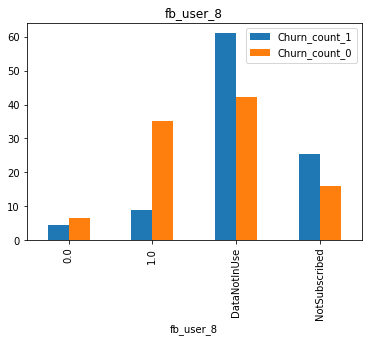

In [787]:

j=1
df_cat= df.select_dtypes(include=['object'])
for i in df_cat:
    #if(df[i].dtype=='object'):
    #Replacing NoRecharge with NotSubscribed 
   # df.replace(to_replace='NoRecharge',value='NotSubscribed',inplace=True)

   # plt.figure(figsize=(10,15))
    #plt.subplot(1,2,1)
    df2=df[[i,'Churn_val']]
    df2=df2[df2['Churn_val']==1].groupby(i).count()/len(df2[df2['Churn_val']==1])*100
    df2.rename(columns={'Churn_val':'Churn_count_1'},inplace=True)
    df3=df2.copy()
    #df2.plot.bar(y='Churn_val')
    #df2.plot.pie(y='Churn_val')
    #plt.title('{},Churn=1'.format(i))
    #plt.subplot(1,2,2)
    plt.figure(figsize=(20,60))
    df2=df[[i,'Churn_val']]
    df2=df2[df2['Churn_val']==0].groupby(i).count()/len(df2[df2['Churn_val']==0])*100
    
    df2.rename(columns={'Churn_val':'Churn_count_0'},inplace=True)
    df3['Churn_count_0']=df2['Churn_count_0']
    df3.plot.bar(y=['Churn_count_1','Churn_count_0'])
    #df2.plot.pie(y='Churn_val')
    plt.title('{}'.format(i))
    #print(i)
    #print(df2.head())
    j=j+1

    
        

#### Observation
- Here 0 imples no renewal of the pack done but subscribed
- Among churned users 60% users are not using data, non-churned users, only 40% are not using
- Nightpack
	- we notice that  NotSubscribed increases significantly every month starting from June to Aug for churn users
	- we notice that  NotSubscribed more or less remains same or reduces every month starting from June to Aug for non-chrun users
	- Even the count of 1 keeps reducing , as months move from June to Aug for churned users
	- count of 1 remains more or less same , as months move from June to Aug for non-churned users
	- Assuming 0 means not renewed, as months progress, it reduces and unsubsribing increases.

- Sachet 2g
	- The user percentage for 0  and other categories decreases from june to aug
- Monthly 3g
	- Reduces/becomes zero in bad phase month(Aug) as compared to good phase
- Fb_user
	- Unsubscription increases, renewal decreases for churned users

## Dual Variable Analysis
- Remove columns with correlation equal to or more than 0.75
- Keep only less correlated columns

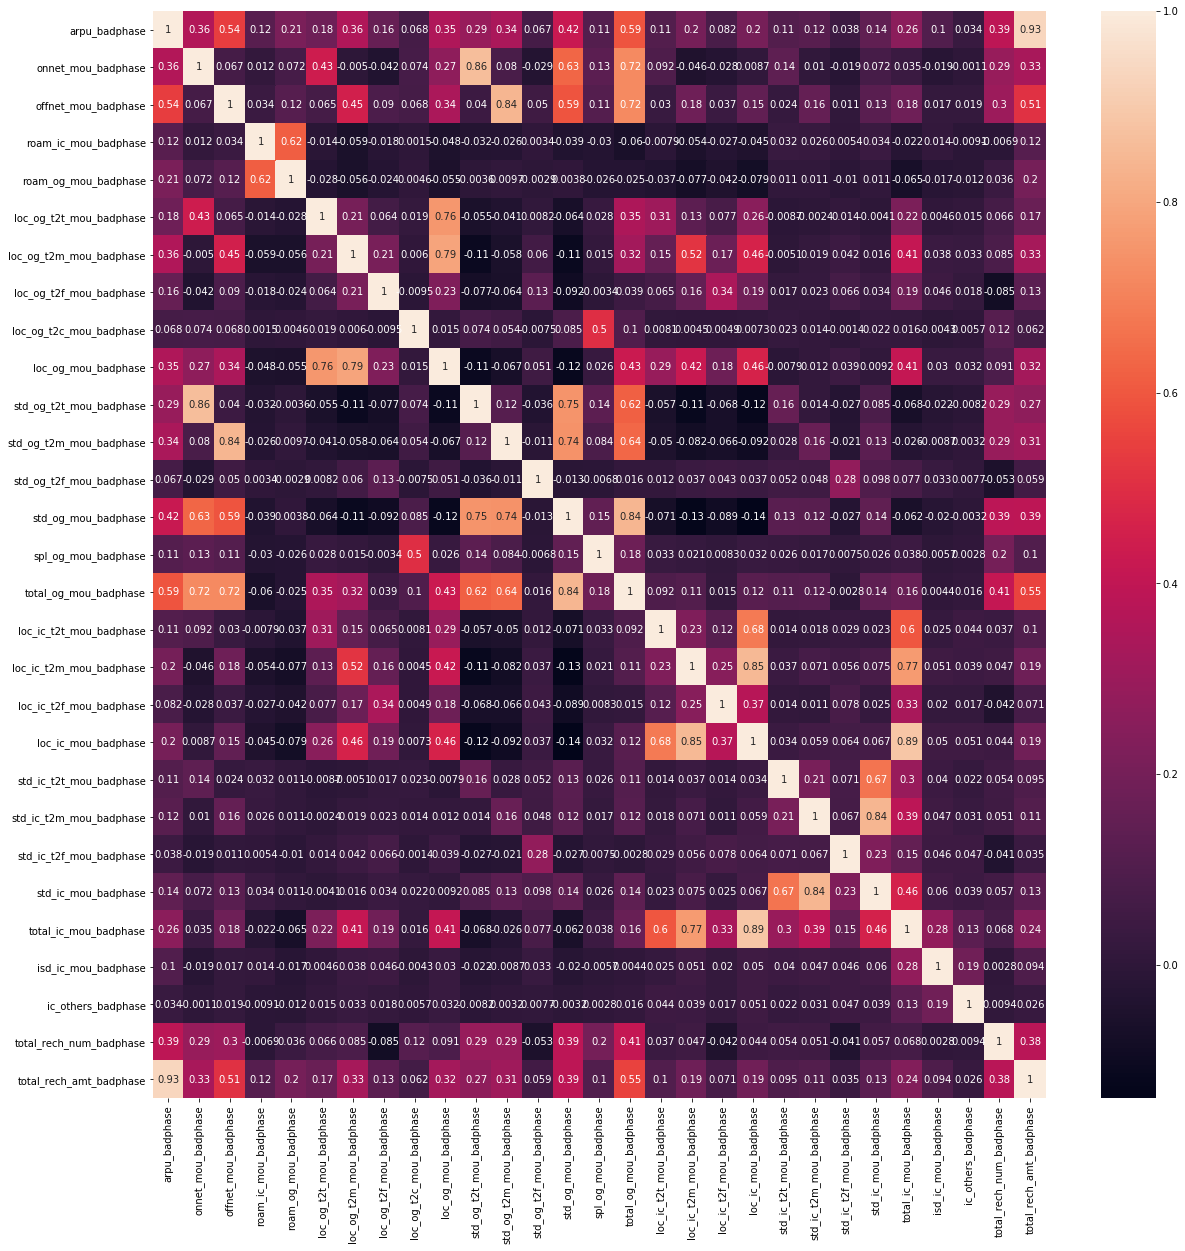

In [788]:
plt.figure(figsize=(20,20))
sns.heatmap(df[df.columns[1:30]].corr(),annot=True)

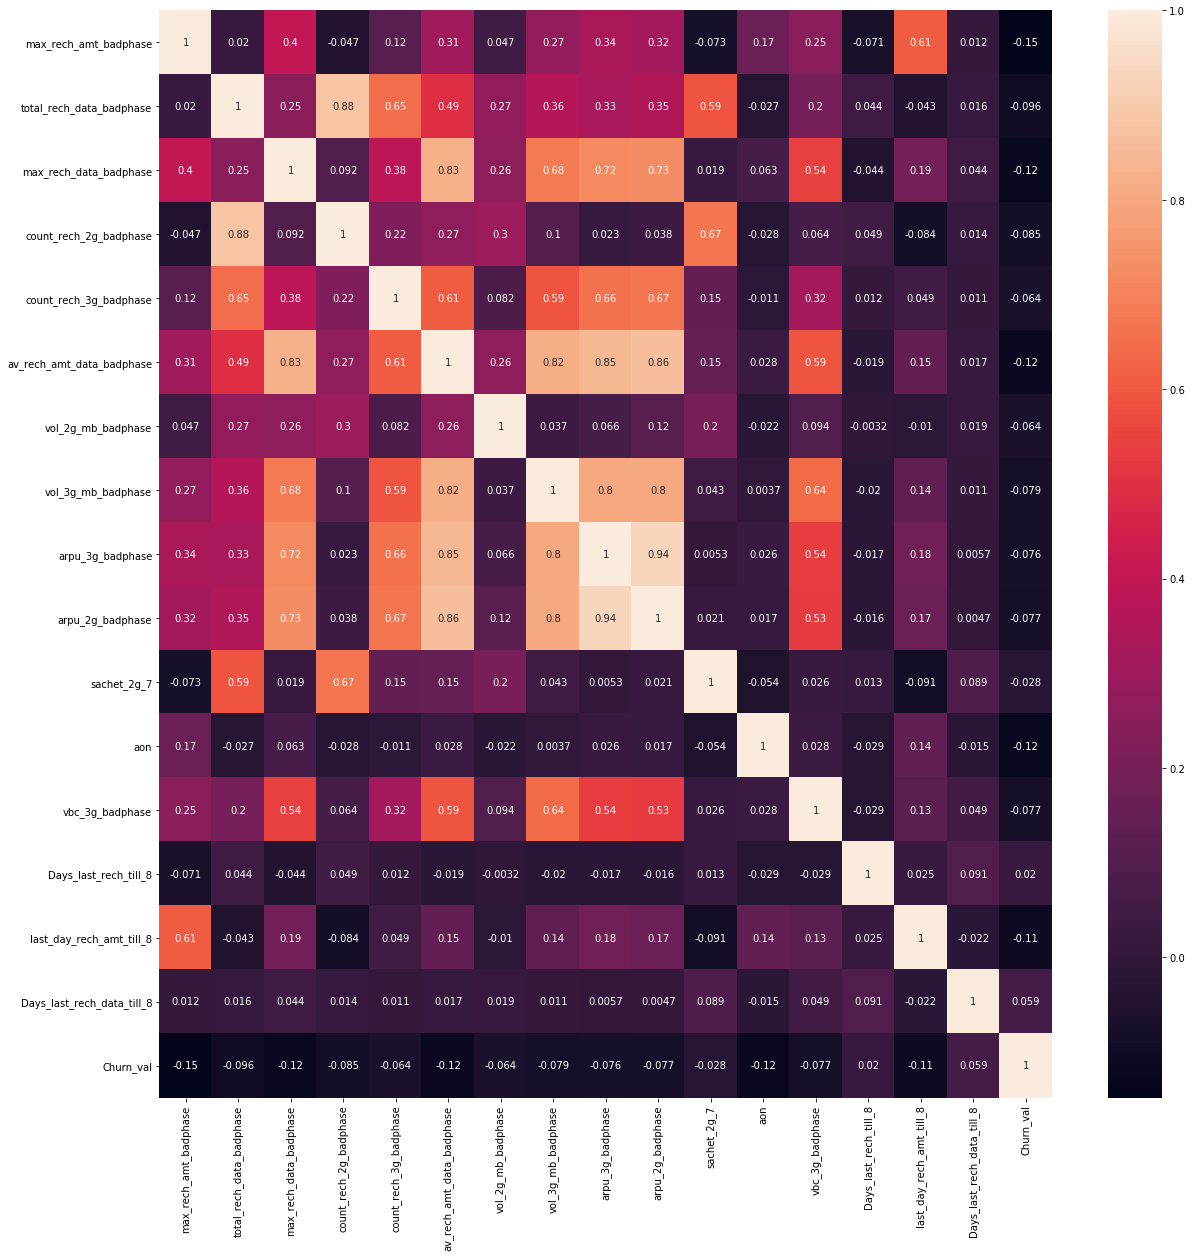

In [789]:
plt.figure(figsize=(20,20))
sns.heatmap(df[df.columns[30:60]].corr(),annot=True)

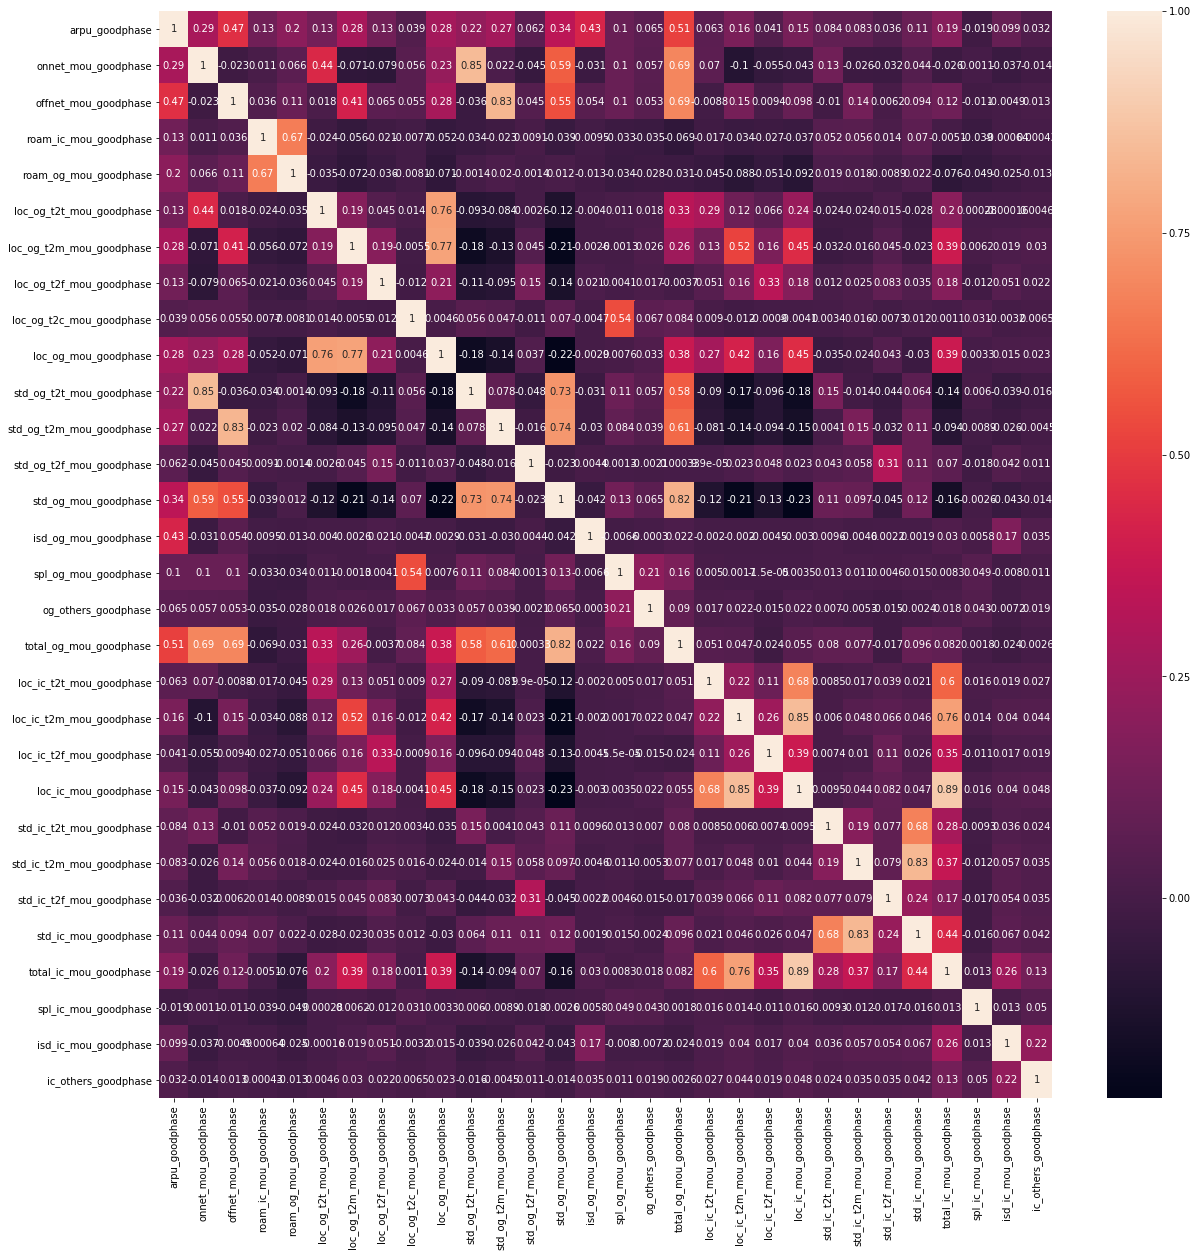

In [790]:
plt.figure(figsize=(20,20))
sns.heatmap(df[df.columns[60:90]].corr(),annot=True)

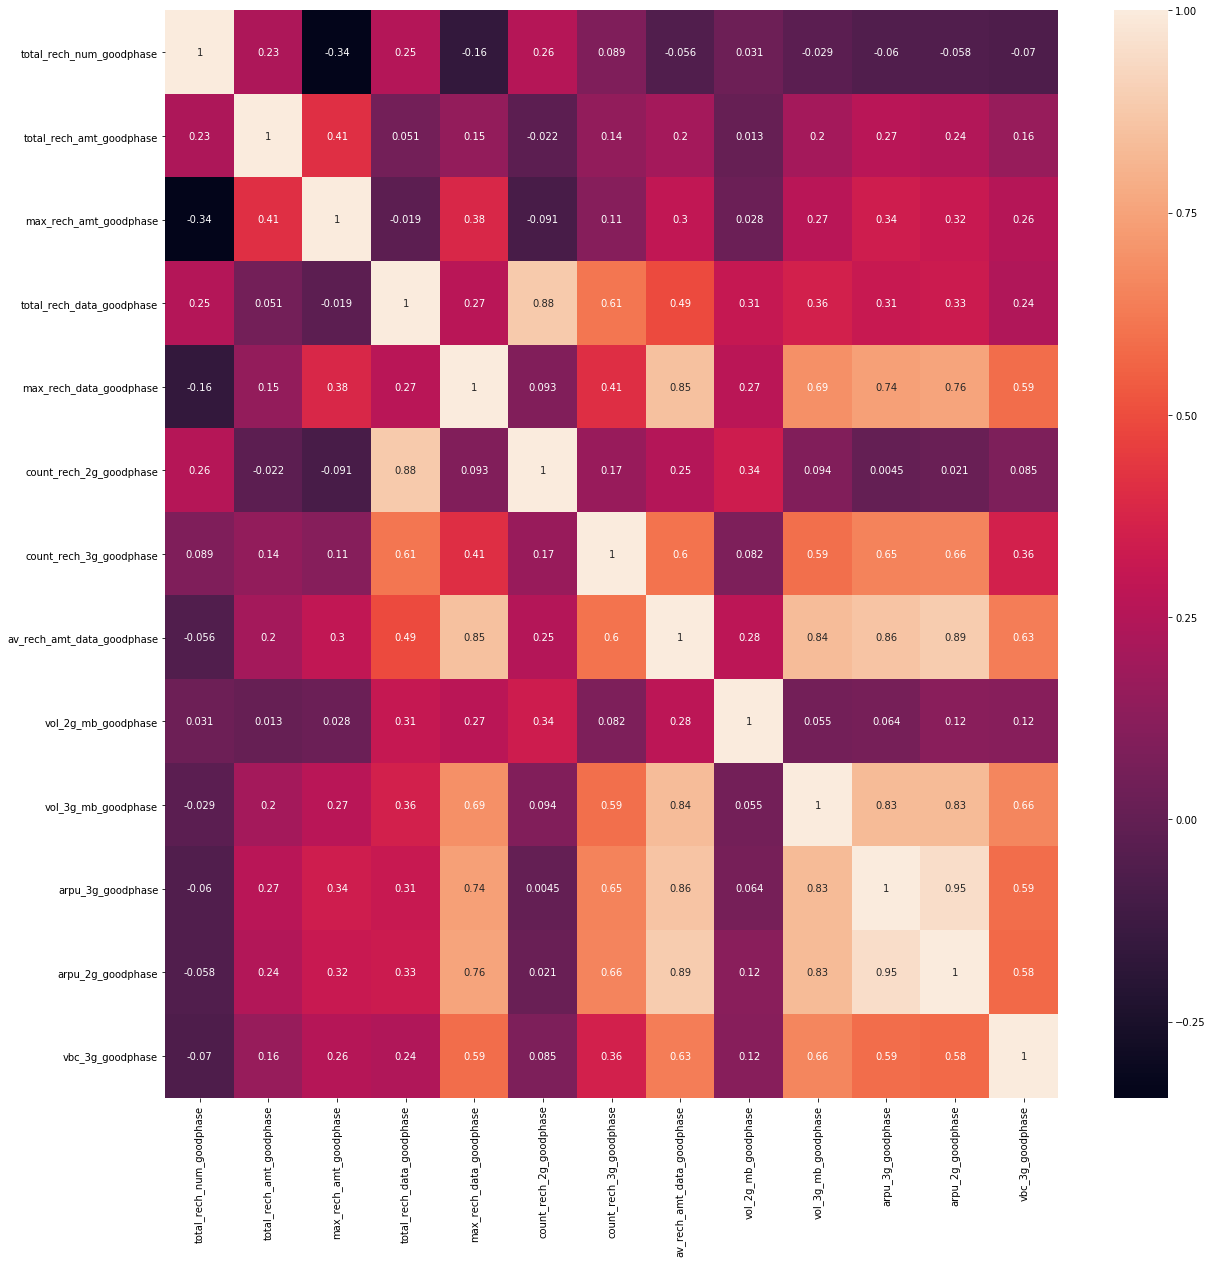

In [791]:
plt.figure(figsize=(20,20))
sns.heatmap(df[df.columns[90:120]].corr(),annot=True)

In [792]:
#Dropping columns with more than 0.75 correlated columns
df.drop(columns=['onnet_mou_badphase','offnet_mou_badphase','loc_og_t2m_mou_badphase','loc_og_t2m_mou_badphase',
                 'total_og_mou_badphase','loc_ic_t2t_mou_badphase','std_ic_t2m_mou_badphase','total_ic_mou_badphase',
                 'total_rech_amt_badphase','av_rech_amt_data_badphase','vol_3g_mb_badphase','arpu_2g_badphase','arpu_badphase',
                 'std_og_t2t_mou_goodphase','std_og_t2m_mou_goodphase','loc_og_t2m_mou_goodphase',
                 'loc_og_t2m_mou_goodphase','total_og_mou_goodphase','loc_ic_t2m_mou_goodphase','total_ic_mou_goodphase',
                 'std_ic_t2m_mou_goodphase','count_rech_2g_goodphase','av_rech_amt_data_goodphase',
                 'max_rech_data_goodphase','vol_3g_mb_goodphase','arpu_2g_goodphase'
],axis=1,inplace=True)

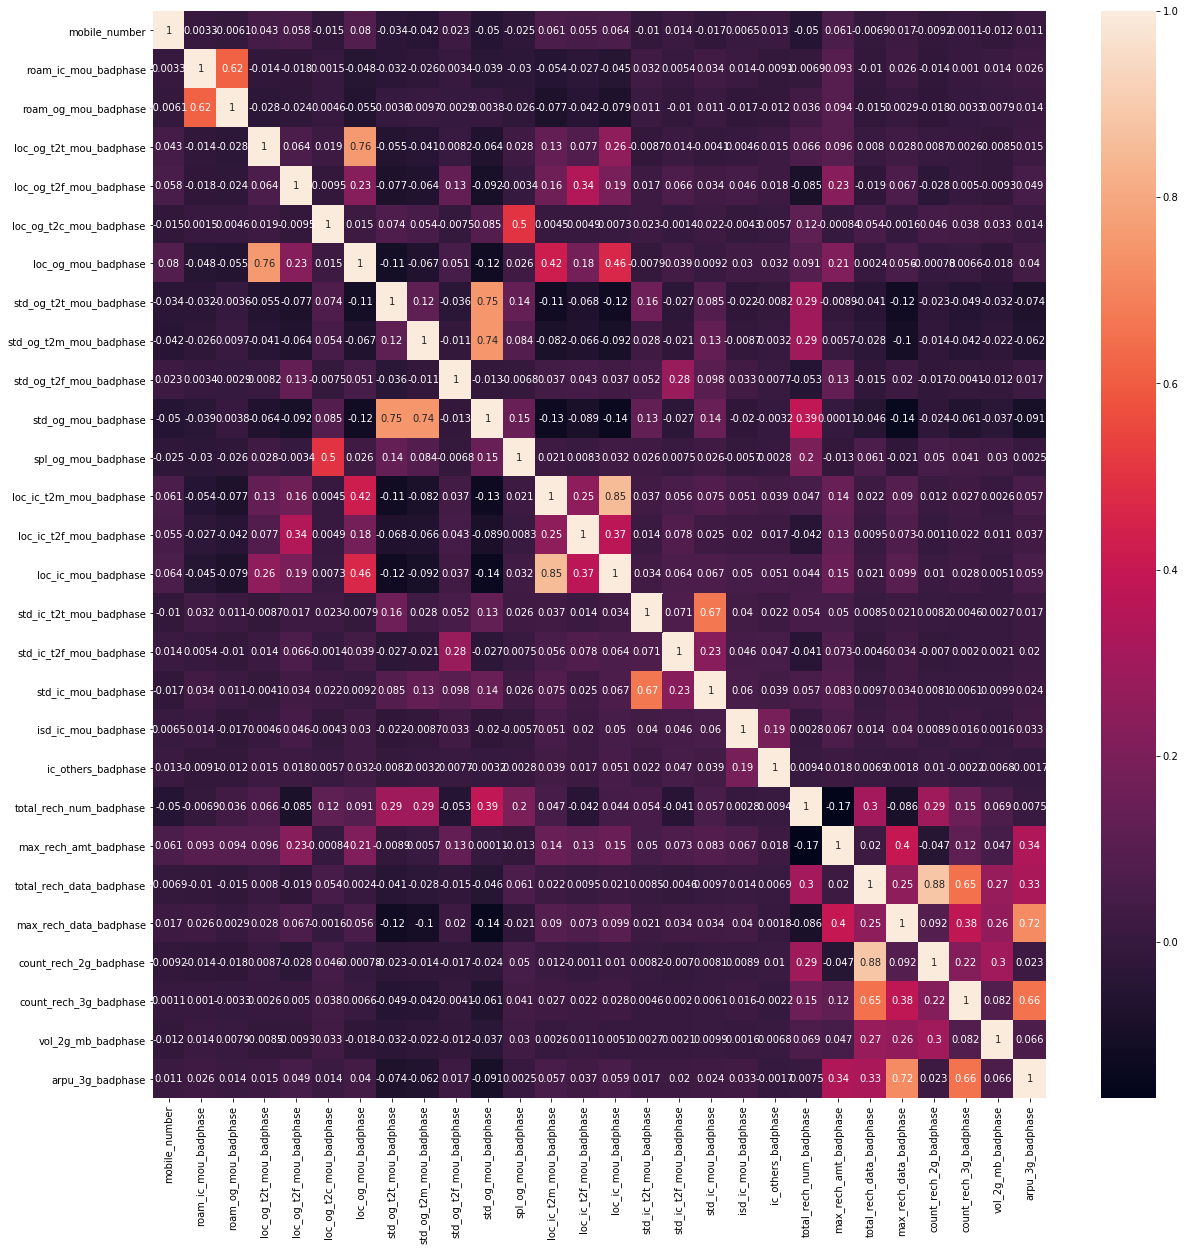

In [793]:
plt.figure(figsize=(20,20))
sns.heatmap(df[df.columns[0:30]].corr(),annot=True)

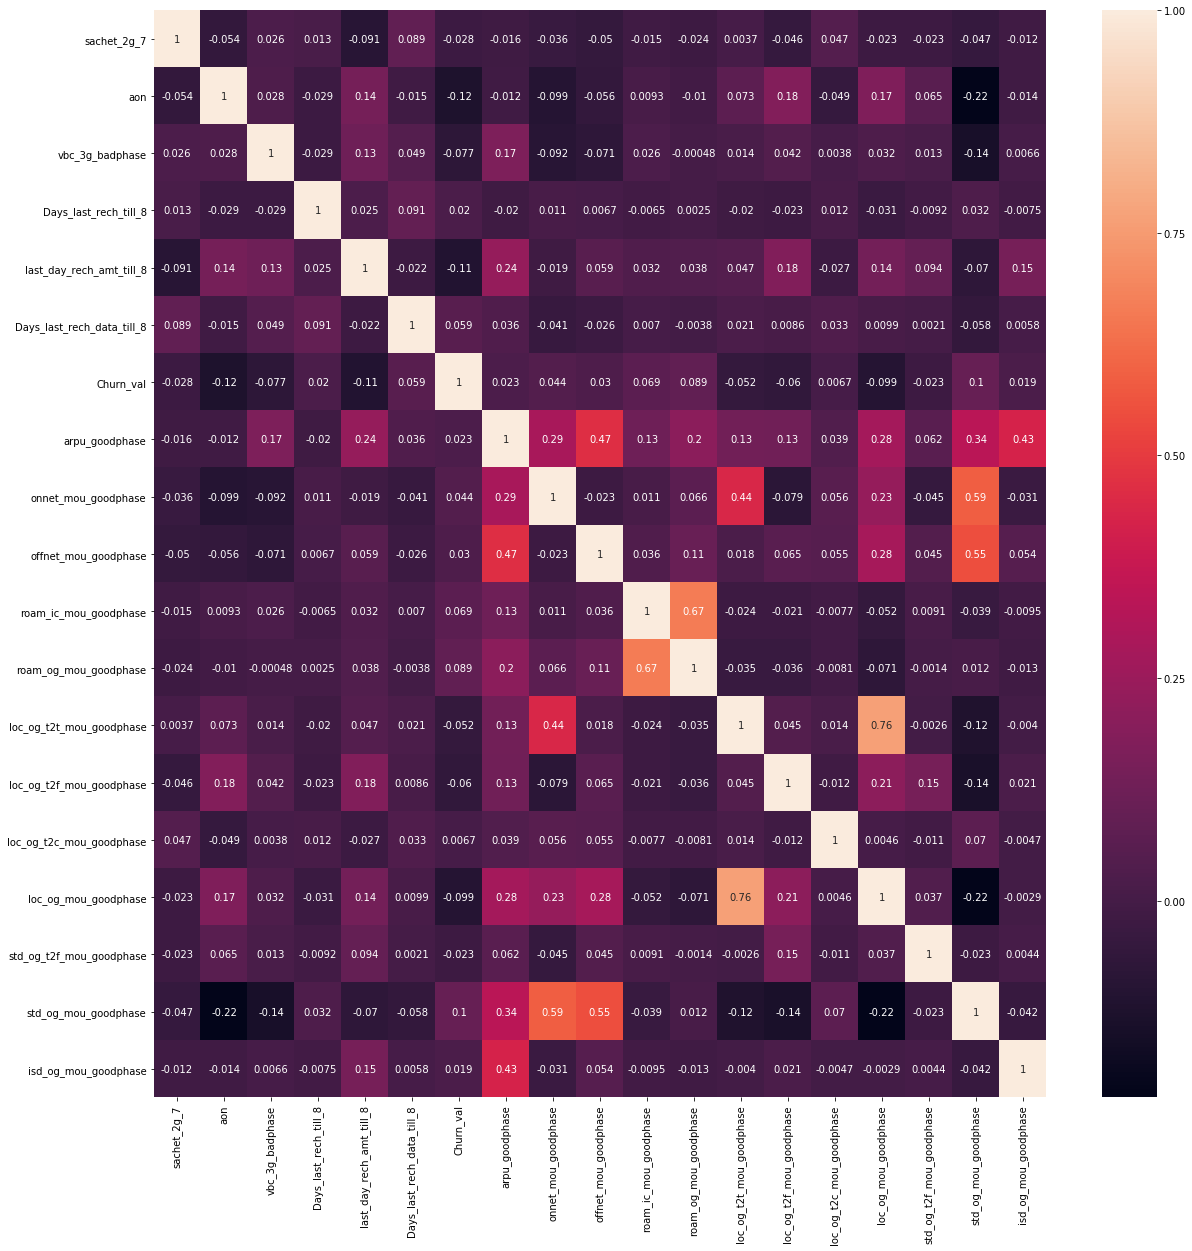

In [794]:
plt.figure(figsize=(20,20))
sns.heatmap(df[df.columns[30:60]].corr(),annot=True)

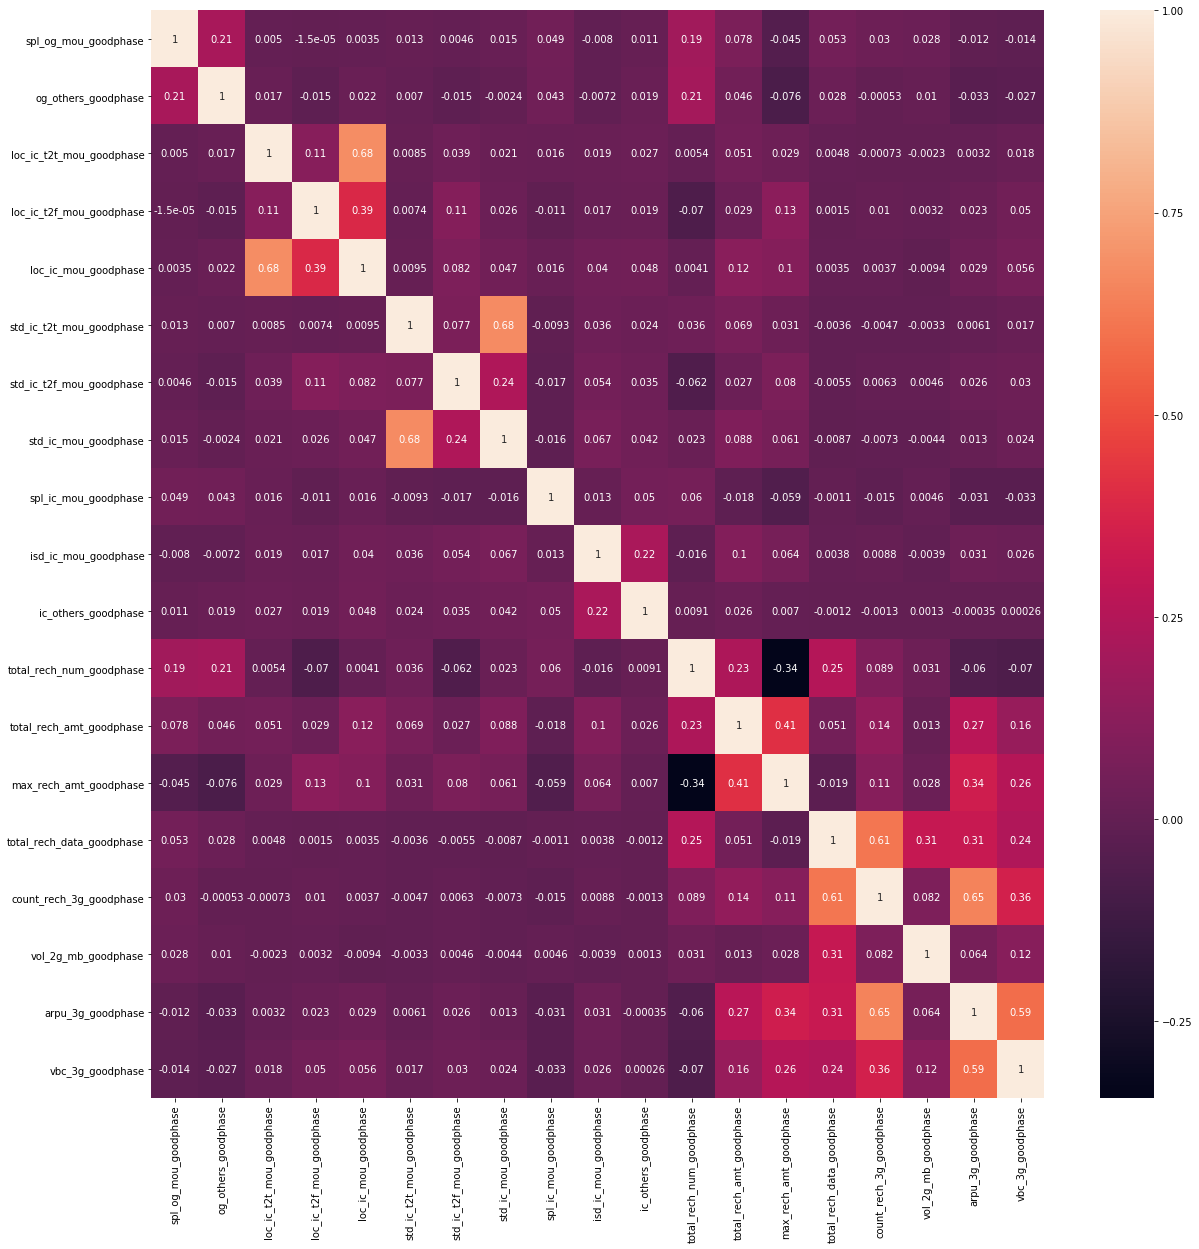

In [795]:
plt.figure(figsize=(20,20))
sns.heatmap(df[df.columns[60:90]].corr(),annot=True)

In [796]:
df.drop(columns=['loc_og_t2t_mou_badphase','std_og_t2t_mou_badphase','std_og_t2m_mou_badphase','loc_ic_t2m_mou_badphase','count_rech_2g_badphase','loc_og_t2t_mou_goodphase'],axis=1,inplace=True)

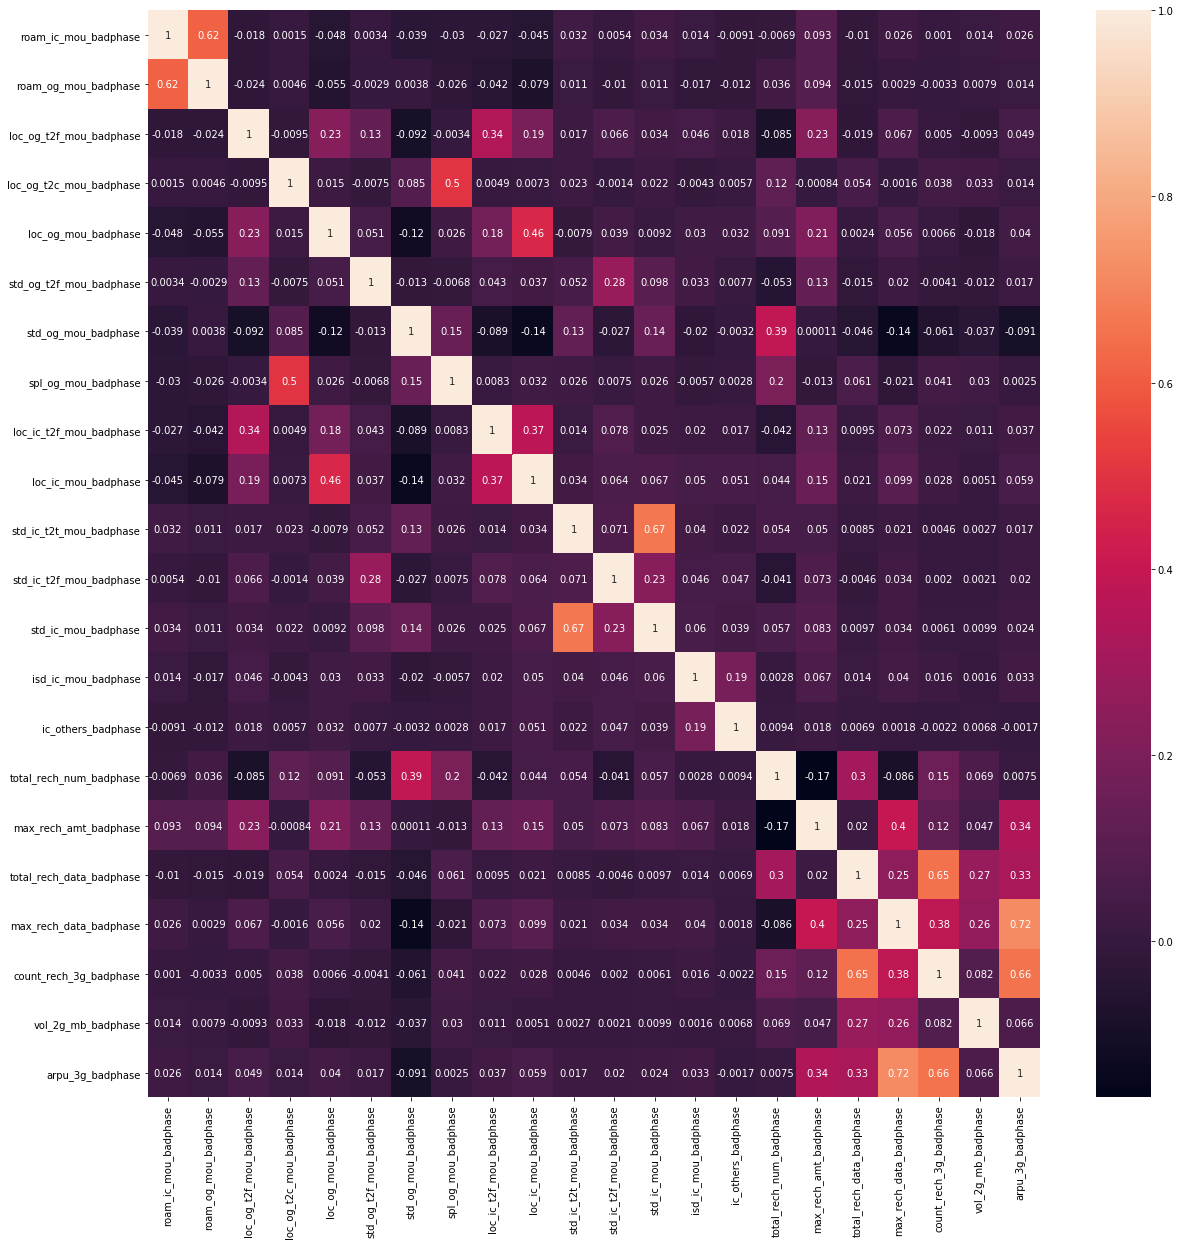

In [797]:
plt.figure(figsize=(20,20))
sns.heatmap(df[df.columns[1:25]].corr(),annot=True)

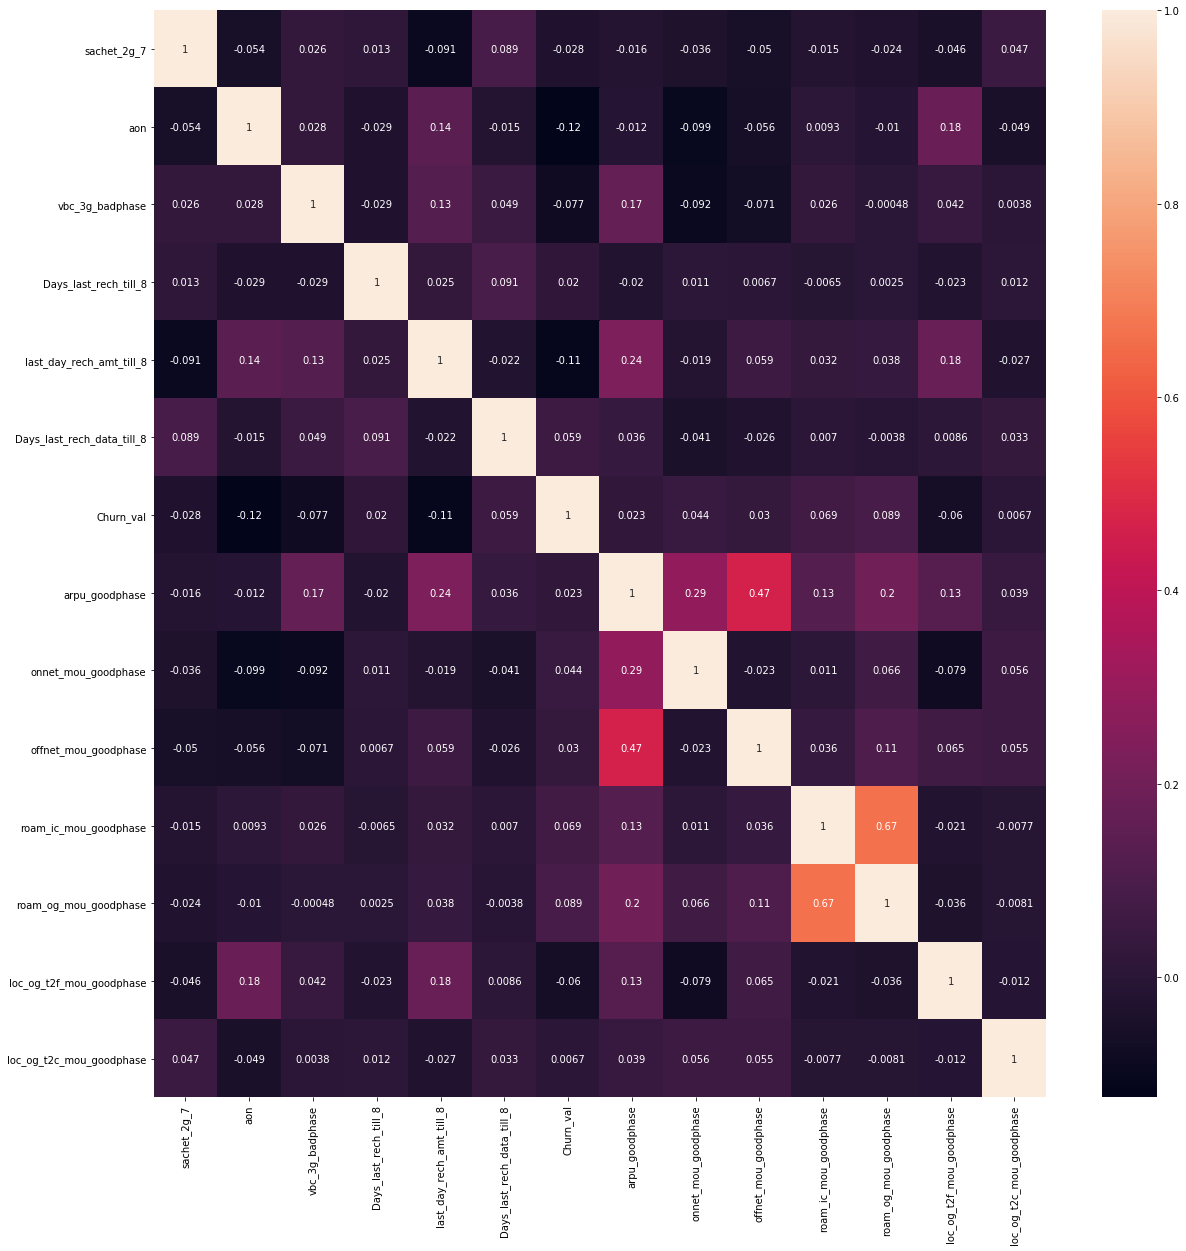

In [798]:
plt.figure(figsize=(20,20))
sns.heatmap(df[df.columns[25:50]].corr(),annot=True)

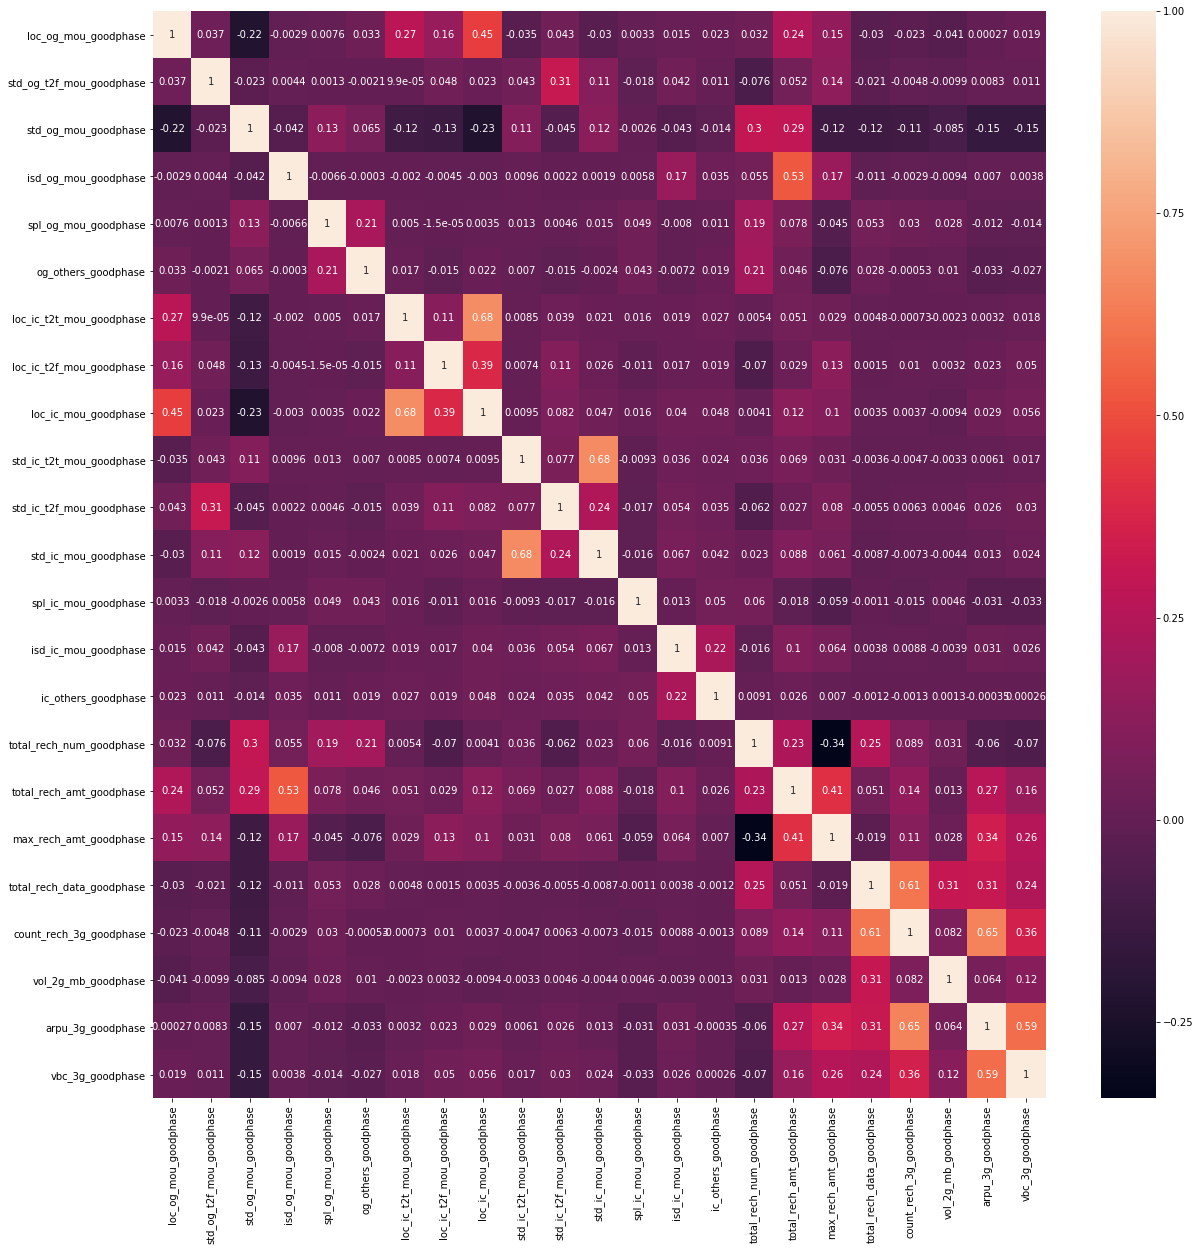

In [799]:
plt.figure(figsize=(20,20))
sns.heatmap(df[df.columns[50:]].corr(),annot=True)

# Data Preparation

In [800]:
df_cat= df.select_dtypes(include=['object'])
df_cat.head()

night_pck_user_6 night_pck_user_7 night_pck_user_8 monthly_2g_6  \
7      DataNotInUse     DataNotInUse     DataNotInUse            0   
8     NotSubscribed                0                0            0   
13    NotSubscribed    NotSubscribed                0            0   
16     DataNotInUse     DataNotInUse     DataNotInUse            0   
17     DataNotInUse     DataNotInUse     DataNotInUse            0   

   monthly_2g_7 sachet_2g_6 sachet_2g_8 monthly_3g_6 monthly_3g_7  \
7             0           0           0            0            0   
8             1           0           3            0            0   
13            0           0           3            0            0   
16            0           0           0            0            0   
17            0           0           0            0            0   

   monthly_3g_8      fb_user_6      fb_user_7     fb_user_8  
7             0   DataNotInUse   DataNotInUse  DataNotInUse  
8             0  NotSubscribed              1             1  
13            0  NotSubscribed  NotSubscribed             1  
16            0   DataNotInUse   DataNotInUse  DataNotInUse  
17            0   DataNotInUse   DataNotInUse  DataNotInUse

In [801]:
df.head()

mobile_number  roam_ic_mou_badphase  roam_og_mou_badphase  \
7      7000701601                 31.64                 38.06   
8      7001524846                  0.00                  0.00   
13     7002191713                 72.11                  1.44   
16     7000875565                  0.00                  0.00   
17     7000187447                  4.81                 13.34   

    loc_og_t2f_mou_badphase  loc_og_t2c_mou_badphase  loc_og_mou_badphase  \
7                     53.23                     0.00               255.79   
8                      0.00                     7.15                63.04   
13                    23.51                     0.49               353.99   
16                    10.26                     0.00               205.93   
17                     0.00                     0.00                 0.00   

    std_og_t2f_mou_badphase  std_og_mou_badphase  spl_og_mou_badphase  \
7                     16.68                77.84                 6.50   
8                      0.00                98.28                10.23   
13                     0.00               655.18                 4.78   
16                     0.00                21.53                 5.91   
17                     0.00                 0.00                 0.00   

    loc_ic_t2f_mou_badphase  loc_ic_mou_badphase  std_ic_t2t_mou_badphase  \
7                     39.53               188.04                    30.39   
8                      0.00                15.79                     0.10   
13                     7.49               255.26                   154.58   
16                    32.71               211.78                     6.33   
17                     0.00                 0.00                     0.00   

    std_ic_t2f_mou_badphase  std_ic_mou_badphase  isd_ic_mou_badphase  \
7                     22.21               193.94                31.59   
8                      0.00                 0.75                 0.00   
13                     1.91               474.41               393.39   
16                     2.18                82.44                 0.23   
17                     0.00                 0.00                 0.00   

    ic_others_badphase  total_rech_num_badphase  max_rech_amt_badphase  \
7                15.14                        7                   1580   
8                 0.00                       14                     30   
13               21.44                       11                    130   
16                0.00                        2                    130   
17                0.00                        4                     30   

    total_rech_data_badphase  max_rech_data_badphase  count_rech_3g_badphase  \
7                        0.0                     0.0                     0.0   
8                        3.0                    23.0                     0.0   
13                       3.0                    23.0                     0.0   
16                       0.0                     0.0                     0.0   
17                       0.0                     0.0                     0.0   

    vol_2g_mb_badphase  arpu_3g_badphase night_pck_user_6 night_pck_user_7  \
7                 0.00              0.00     DataNotInUse     DataNotInUse   
8                 0.03             19.83    NotSubscribed                0   
13                0.02              0.00    NotSubscribed    NotSubscribed   
16                0.00              0.00     DataNotInUse     DataNotInUse   
17                0.00              0.00     DataNotInUse     DataNotInUse   

   night_pck_user_8 monthly_2g_6 monthly_2g_7 sachet_2g_6  sachet_2g_7  \
7      DataNotInUse            0            0           0            0   
8                 0            0            1           0            1   
13                0            0            0           0            0   
16     DataNotInUse            0            0           0            0   
17     DataNotInUse            0            

In [802]:
# convert into dummies
df_dummies = pd.get_dummies(df_cat, drop_first=True)
df_dummies.head()

night_pck_user_6_1.0  night_pck_user_6_DataNotInUse  \
7                      0                              1   
8                      0                              0   
13                     0                              0   
16                     0                              1   
17                     0                              1   

    night_pck_user_6_NotSubscribed  night_pck_user_7_1.0  \
7                                0                     0   
8                                1                     0   
13                               1                     0   
16                               0                     0   
17                               0                     0   

    night_pck_user_7_DataNotInUse  night_pck_user_7_NotSubscribed  \
7                               1                               0   
8                               0                               0   
13                              0                               1   
16                              1                               0   
17                              1                               0   

    night_pck_user_8_1.0  night_pck_user_8_DataNotInUse  \
7                      0                              1   
8                      0                              0   
13                     0                              0   
16                     0                              1   
17                     0                              1   

    night_pck_user_8_NotSubscribed  monthly_2g_6_1  monthly_2g_6_Others  \
7                                0               0                    0   
8                                0               0                    0   
13                               0               0                    0   
16                               0               0                    0   
17                               0               0                    0   

    monthly_2g_7_1  monthly_2g_7_Others  sachet_2g_6_1  sachet_2g_6_2  \
7                0                    0              0              0   
8                1                    0              0              0   
13               0                    0              0              0   
16               0                    0              0              0   
17               0                    0              0              0   

    sachet_2g_6_3  sachet_2g_6_Others  sachet_2g_8_1  sachet_2g_8_2  \
7               0                   0              0              0   
8               0                   0              0              0   
13              0                   0              0              0   
16              0                   0              0              0   
17              0                   0              0              0   

    sachet_2g_8_3  sachet_2g_8_4  sachet_2g_8_Others  monthly_3g_6_1  \
7               0              0                   0               0   
8               1              0                   0               0   
13              1              0                   0               0   
16              0              0                   0               0   
17              0              0                   0               0   

    monthly_3g_6_Others  monthly_3g_7_1  monthly_3g_7_2  monthly_3g_7_Others  \
7                     0               0               0                    0   
8                     0               0               0                    0   
13                    0               0               0                    0   
16                    0               0               0                    0   
17                    0               0               0                    0   

    monthly_3g_8_1  monthly_3g_8_2  monthly_3g_8_Others  fb_user_6_1.0  \
7                0               0                    0              0   
8                0               0                    0              0   
13               0               0                    0          

In [803]:
# drop categorical variables 
df = df.drop(list(df_cat.columns), axis=1)

In [804]:
# concat dummy variables with X
df = pd.concat([df, df_dummies], axis=1)

In [805]:
#Find list of columns with 95% or more data same
drop_list=[]
for i in df.columns:
    if(i!='Id'):
        #print(list(df[i].value_counts())[0])
        if((round(list(df[i].value_counts())[0]/len(df)*100),2)[0]>=95):
            drop_list.append(i)
print(drop_list)

['night_pck_user_6_1.0', 'night_pck_user_7_1.0', 'night_pck_user_8_1.0', 'monthly_2g_6_Others', 'monthly_2g_7_Others', 'sachet_2g_6_2', 'sachet_2g_6_3', 'sachet_2g_6_Others', 'sachet_2g_8_2', 'sachet_2g_8_3', 'sachet_2g_8_4', 'sachet_2g_8_Others', 'monthly_3g_6_Others', 'monthly_3g_7_2', 'monthly_3g_7_Others', 'monthly_3g_8_2', 'monthly_3g_8_Others']


In [806]:
df.drop(columns=drop_list,axis=1,inplace=True)

In [807]:
#df_2=df.copy()

In [808]:
df.shape

(29991, 82)

In [809]:
#Splittling into y and X
y=df.pop('Churn_val')
X=df

In [810]:
X.head()

mobile_number  roam_ic_mou_badphase  roam_og_mou_badphase  \
7      7000701601                 31.64                 38.06   
8      7001524846                  0.00                  0.00   
13     7002191713                 72.11                  1.44   
16     7000875565                  0.00                  0.00   
17     7000187447                  4.81                 13.34   

    loc_og_t2f_mou_badphase  loc_og_t2c_mou_badphase  loc_og_mou_badphase  \
7                     53.23                     0.00               255.79   
8                      0.00                     7.15                63.04   
13                    23.51                     0.49               353.99   
16                    10.26                     0.00               205.93   
17                     0.00                     0.00                 0.00   

    std_og_t2f_mou_badphase  std_og_mou_badphase  spl_og_mou_badphase  \
7                     16.68                77.84                 6.50   
8                      0.00                98.28                10.23   
13                     0.00               655.18                 4.78   
16                     0.00                21.53                 5.91   
17                     0.00                 0.00                 0.00   

    loc_ic_t2f_mou_badphase  loc_ic_mou_badphase  std_ic_t2t_mou_badphase  \
7                     39.53               188.04                    30.39   
8                      0.00                15.79                     0.10   
13                     7.49               255.26                   154.58   
16                    32.71               211.78                     6.33   
17                     0.00                 0.00                     0.00   

    std_ic_t2f_mou_badphase  std_ic_mou_badphase  isd_ic_mou_badphase  \
7                     22.21               193.94                31.59   
8                      0.00                 0.75                 0.00   
13                     1.91               474.41               393.39   
16                     2.18                82.44                 0.23   
17                     0.00                 0.00                 0.00   

    ic_others_badphase  total_rech_num_badphase  max_rech_amt_badphase  \
7                15.14                        7                   1580   
8                 0.00                       14                     30   
13               21.44                       11                    130   
16                0.00                        2                    130   
17                0.00                        4                     30   

    total_rech_data_badphase  max_rech_data_badphase  count_rech_3g_badphase  \
7                        0.0                     0.0                     0.0   
8                        3.0                    23.0                     0.0   
13                       3.0                    23.0                     0.0   
16                       0.0                     0.0                     0.0   
17                       0.0                     0.0                     0.0   

    vol_2g_mb_badphase  arpu_3g_badphase  sachet_2g_7   aon  vbc_3g_badphase  \
7                 0.00              0.00            0   802            57.74   
8                 0.03             19.83            1   315            21.03   
13                0.02              0.00            0  2607             0.00   
16                0.00              0.00            0   511             0.00   
17                0.00              0.00            0   667             0.00   

    Days_last_rech_till_8  last_day_rech_amt_till_8  \
7                       5                       779   
8                       1                        10   
13                      1                         0   
16                     17                       130   
17                      6                         0   

    Days_last_rech_data_till_8  arpu_goodphase  onnet_mou_goodphase  \


In [811]:
# split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [812]:
test_mobilenum=X_test['mobile_number']
X_test=X_test.drop(columns=['mobile_number'],axis=1)
#train_mobilenum=X_train['mobile_number']
X_train=X_train.drop(columns=['mobile_number'],axis=1)



In [813]:
stdscale=StandardScaler()
cols = X_train.columns
#cols.remove('mobile_number')
X_train = pd.DataFrame(stdscale.fit_transform(X_train))
#cols.append(mobile_number)
X_train.columns = cols

#Scaling test and train
cols = X_test.columns
#cols.remove('mobile_number')
X_test = pd.DataFrame(stdscale.transform(X_test))
#cols.append(mobile_number)
X_test.columns = cols



In [814]:
test_mobilenum.head()

83339    7001033131
68510    7000373352
92632    7002079741
78687    7001647697
93703    7000016675
Name: mobile_number, dtype: int64

# Checking and handling class imbalance in train

In [815]:
#Checking class imbalance
y_train.value_counts()/len(y_train)*100

0    91.559091
1     8.440909
Name: Churn_val, dtype: float64

#### Observation
- Implies that there is class imbalance
- % of churned users is hardly 8% in the train dataset, so model maybe biased
- So SMOTE will be applied

### Treat Class imbalance using SMOTE

In [816]:
# calling SMote
oversample=SMOTE()

In [817]:
#storing in X-train_1 and y_train_1
X_train_1, y_train_1 = oversample.fit_resample(X_train, y_train)

In [818]:
stdscale=StandardScaler()
cols = X_train_1.columns
#cols.remove('mobile_number')
X_train_1 = pd.DataFrame(stdscale.fit_transform(X_train_1))
#cols.append(mobile_number)
X_train_1.columns = cols

#Scaling test and train
cols = X_test.columns
#cols.remove('mobile_number')
X_test_1 = pd.DataFrame(stdscale.transform(X_test))
#cols.append(mobile_number)
X_test_1.columns = cols

In [819]:
#calculating count percentage
y_train_1.value_counts()/len(y_train_1)*100

1    50.0
0    50.0
Name: Churn_val, dtype: float64

In [820]:
X_test_1.head()

roam_ic_mou_badphase  roam_og_mou_badphase  loc_og_t2f_mou_badphase  \
0             -0.218887             -0.249434                -0.264997   
1             -0.226235             -0.249434                -0.264997   
2             -0.226235             -0.249434                -0.264997   
3             -0.226235             -0.249434                 0.652449   
4             -0.226235             -0.249434                -0.264997   

   loc_og_t2c_mou_badphase  loc_og_mou_badphase  std_og_t2f_mou_badphase  \
0                -0.220862             0.028690                -0.128386   
1                -0.220862            -0.595229                -0.128386   
2                -0.220862            -0.520633                -0.128386   
3                -0.220862             1.146419                -0.128386   
4                -0.220862            -0.594499                -0.128386   

   std_og_mou_badphase  spl_og_mou_badphase  loc_ic_t2f_mou_badphase  \
0             2.872056             0.051616                -0.202722   
1            -0.501425            -0.285092                -0.288657   
2             1.466214             0.965536                -0.244074   
3            -0.501178            -0.228467                 0.090299   
4             0.284718             2.131531                -0.288657   

   loc_ic_mou_badphase  std_ic_t2t_mou_badphase  std_ic_t2f_mou_badphase  \
0            -0.017845                -0.043279                -0.122071   
1            -0.645344                -0.180559                -0.122071   
2            -0.555828                 0.103424                -0.122071   
3             0.680833                -0.205831                -0.122071   
4            -0.633521                -0.042851                 0.357077   

   std_ic_mou_badphase  isd_ic_mou_badphase  ic_others_badphase  \
0             0.296749             0.760771            0.008204   
1            -0.281497            -0.146894           -0.093521   
2            -0.091068            -0.146894            0.007021   
3            -0.313644            -0.146894           -0.093521   
4             0.235102            -0.146894           -0.093521   

   total_rech_num_badphase  max_rech_amt_badphase  total_rech_data_badphase  \
0                 1.076052               0.337359                 -0.357957   
1                -0.473075               0.888049                 -0.357957   
2                -0.234747               0.072212                 -0.357957   
3                -0.353911               0.072212                 -0.357957   
4                 1.195216              -0.471679                 -0.357957   

   max_rech_data_badphase  count_rech_3g_badphase  vol_2g_mb_badphase  \
0               -0.406127               -0.225509           -0.214145   
1               -0.406127               -0.225509           -0.214145   
2               -0.406127               -0.225509           -0.214145   
3               -0.406127               -0.225509           -0.214145   
4               -0.406127               -0.225509           -0.214145   

   arpu_3g_badphase  sachet_2g_7       aon  vbc_3g_badphase  \
0         -0.258497    -0.293671  0.264883        -0.270554   
1         -0.258497    -0.293671 -0.949989         5.510459   
2         -0.258497    -0.293671 -0.879678        -0.270554   
3         -0.258497    -0.293671  2.975869        -0.270554   
4         -0.258497    -0.293671 -1.008773         0.052161   

   Days_last_rech_till_8  last_day_rech_amt_till_8  \
0               3.501899                  0.414699   
1              -0.614901                  1.327712   
2               1.379174                 -0.543216   
3              -0.550576                  0.429667   
4               1.443499                 -0.169030   

   Days_last_rech_data_till_8  arpu_goodphase  onnet_mou_goodphase  \
0                   -0.625732       -0.024557             0.039092   
1                    1.173222       -0.308772     

#### Observation
- Using SMOTE problem of class imbalance has been solved
- We have achieved a good balance of 50-50

# MODEL 1-Logistic regression with RFE
#using Logistic regression and RFE for feature selection and to make the model interpretable

In [821]:
# Logistic regression model
logm1 = sm.GLM(y_train_1,(sm.add_constant(X_train_1)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Churn_val   No. Observations:                38442
Model:                            GLM   Df Residuals:                    38369
Model Family:                Binomial   Df Model:                           72
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15213.
Date:                Mon, 18 May 2020   Deviance:                       30425.
Time:                        13:15:32   Pearson chi2:                 3.70e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.3109      0.017    -17.948      0.000      -0.345      -0.277
roam_ic_mou_badphase              -0.0750      0.020     -3.779      0.000      -0.114      -0.036
roam_og_mou_badphase               0.1381      0.022      6.266      0.000       0.095       0.181
loc_og_t2f_mou_badphase           -0.1011      0.038     -2.629      0.009      -0.176      -0.026
loc_og_t2c_mou_badphase            0.1229      0.025      4.977      0.000       0.075       0.171
loc_og_mou_badphase               -0.8455      0.052    -16.141      0.000      -0.948      -0.743
std_og_t2f_mou_badphase           -0.1697      0.038     -4.515      0.000      -0.243      -0.096
std_og_mou_badphase               -0.5404      0.030    -18.223      0.000      -0.598      -0.482
spl_og_mou_badphase               -0.2790      0.036     -7.849      0.000      -0.349      -0.209
loc_ic_t2f_mou_badphase           -0.1770      0.048     -3.694      0.000      -0.271      -0.083
loc_ic_mou_badphase               -1.0180      0.055    -18.361      0.000      -1.127      -0.909
std_ic_t2t_mou_badphase           -0.2734      0.046     -5.895      0.000      -0.364      -0.182
std_ic_t2f_mou_badphase           -0.1190      0.043     -2.776      0.005      -0.203      -0.035
std_ic_mou_badphase               -0.3033      0.043     -6.983      0.000      -0.388      -0.218
isd_ic_mou_badphase               -0.0634      0.026     -2.420      0.016      -0.115      -0.012
ic_others_badphase                 0.0282      0.028      1.026      0.305      -0.026       0.082
total_rech_num_badphase           -0.6549      0.032    -20.737      0.000      -0.717      -0.593
max_rech_amt_badphase             -0.2681      0.027     -9.876      0.000      -0.321      -0.215
total_rech_data_badphase          -0.1337      0.042     -3.169      0.002      -0.216      -0.051
max_rech_data_badphase            -0.0705      0.041     -1.707      0.088      -0.152       0.010
count_rech_3g_badphase            -0.1608      0.047     -3.452      0.001      -0.252      -0.069
vol_2g_mb_badphase                -0.1567      0.028     -5.584      0.000      -0.212      -0.102
arpu_3g_badphase                   0.1221      0.042      2.904      0.004       0.040       0.204
sachet_2g_7                       -0.1491      0.045     -3.319      0.001      -0.237      -0.061
aon                               -0.3326      0.017    -19.949      0.000      -0.365      -0.300
vbc_3g_badphase                   -0.1529      0.028     -5.480      0.000      -0.208      -0.098
Days_last_rech_till_8             -0.0493      0.015     -3.179      0.001      -0.080      -0.019
last_day_rech_amt_till_8          -0.4147      0.024    -17.454      0.000      -0.461      -0.368
Days_last_rech

### Feature Selection Using RFE

In [822]:

logreg = LogisticRegression()

rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train_1,y_train_1)
# print(rfe.support_)           # Printing the boolean results
# print(rfe.ranking_)           # Printing the ranking

In [823]:
list(zip(X_train_1.columns, rfe.support_, rfe.ranking_))

[('roam_ic_mou_badphase', False, 40),
 ('roam_og_mou_badphase', False, 31),
 ('loc_og_t2f_mou_badphase', False, 25),
 ('loc_og_t2c_mou_badphase', False, 26),
 ('loc_og_mou_badphase', True, 1),
 ('std_og_t2f_mou_badphase', False, 15),
 ('std_og_mou_badphase', True, 1),
 ('spl_og_mou_badphase', False, 14),
 ('loc_ic_t2f_mou_badphase', False, 3),
 ('loc_ic_mou_badphase', True, 1),
 ('std_ic_t2t_mou_badphase', False, 7),
 ('std_ic_t2f_mou_badphase', False, 32),
 ('std_ic_mou_badphase', True, 1),
 ('isd_ic_mou_badphase', False, 43),
 ('ic_others_badphase', False, 54),
 ('total_rech_num_badphase', True, 1),
 ('max_rech_amt_badphase', False, 12),
 ('total_rech_data_badphase', False, 19),
 ('max_rech_data_badphase', False, 45),
 ('count_rech_3g_badphase', False, 35),
 ('vol_2g_mb_badphase', False, 17),
 ('arpu_3g_badphase', False, 38),
 ('sachet_2g_7', False, 33),
 ('aon', True, 1),
 ('vbc_3g_badphase', False, 18),
 ('Days_last_rech_till_8', False, 48),
 ('last_day_rech_amt_till_8', True, 1),


In [824]:
# Variables selected by RFE 

col = ['loc_og_mou_badphase','std_og_mou_badphase','loc_ic_mou_badphase','loc_ic_t2f_mou_badphase',
       'std_ic_mou_badphase','total_rech_num_badphase','last_day_rech_amt_till_8','onnet_mou_goodphase',
       'offnet_mou_goodphase','loc_og_mou_goodphase','std_og_mou_goodphase','loc_ic_mou_goodphase','fb_user_8_1.0']


In [825]:
#col = X_train_1.columns[rfe.support_]

In [826]:
# X_train_1.columns[~rfe.support_]

In [827]:
X_train_sm=sm.add_constant(X_train_1[col])

In [828]:
#Comparing the model with StatsModels
#logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())

logm4 = sm.GLM(y_train_1,(sm.add_constant(X_train_1[col])), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Churn_val   No. Observations:                38442
Model:                            GLM   Df Residuals:                    38428
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16336.
Date:                Mon, 18 May 2020   Deviance:                       32672.
Time:                        13:16:11   Pearson chi2:                 1.75e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.3211      0.017    -19.380      0.000      -0.354      -0.289
loc_og_mou_badphase         -1.1730      0.051    -23.086      0.000      -1.273      -1.073
std_og_mou_badphase         -0.7597      0.027    -27.811      0.000      -0.813      -0.706
loc_ic_mou_badphase         -1.0217      0.053    -19.174      0.000      -1.126      -0.917
loc_ic_t2f_mou_badphase     -0.3980      0.039    -10.189      0.000      -0.475      -0.321
std_ic_mou_badphase         -0.3389      0.027    -12.685      0.000      -0.391      -0.287
total_rech_num_badphase     -0.5316      0.021    -24.979      0.000      -0.573      -0.490
last_day_rech_amt_till_8    -0.4791      0.021    -23.163      0.000      -0.520      -0.439
onnet_mou_goodphase          1.2056      0.066     18.277      0.000       1.076       1.335
offnet_mou_goodphase         1.1932      0.065     18.221      0.000       1.065       1.322
loc_og_mou_goodphase        -0.6024      0.054    -11.191      0.000      -0.708      -0.497
std_og_mou_goodphase        -0.9366      0.088    -10.627      0.000      -1.109      -0.764
loc_ic_mou_goodphase         0.4931      0.037     13.479      0.000       0.421       0.565
fb_user_8_1.0               -0.4619      0.015    -30.037      0.000      -0.492      -0.432
============================================================================================
"""

In [829]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_1[col].values, i) for i in range(X_train_1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
10      std_og_mou_goodphase  25.13
7        onnet_mou_goodphase  14.19
8       offnet_mou_goodphase  13.84
9       loc_og_mou_goodphase   8.94
0        loc_og_mou_badphase   3.34
2        loc_ic_mou_badphase   3.19
11      loc_ic_mou_goodphase   2.79
1        std_og_mou_badphase   1.98
5    total_rech_num_badphase   1.46
3    loc_ic_t2f_mou_badphase   1.23
6   last_day_rech_amt_till_8   1.15
12             fb_user_8_1.0   1.15
4        std_ic_mou_badphase   1.06

#### Observation
- Probabilities is zero for all the variables
- On inspecting VIF, we find few values above 5
- For next iteration removing std_og_mou_goodphase as it has high VIF

In [830]:
#Removing column with highest VIF
col.remove('std_og_mou_goodphase')
#Comparing the model with StatsModels
#logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())

logm4 = sm.GLM(y_train_1,(sm.add_constant(X_train_1[col])), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Churn_val   No. Observations:                38442
Model:                            GLM   Df Residuals:                    38429
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16399.
Date:                Mon, 18 May 2020   Deviance:                       32799.
Time:                        13:16:12   Pearson chi2:                 1.97e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.3226      0.017    -19.468      0.000      -0.355      -0.290
loc_og_mou_badphase         -1.1639      0.051    -23.004      0.000      -1.263      -1.065
std_og_mou_badphase         -0.8266      0.027    -30.394      0.000      -0.880      -0.773
loc_ic_mou_badphase         -1.0170      0.053    -19.151      0.000      -1.121      -0.913
loc_ic_t2f_mou_badphase     -0.4011      0.039    -10.255      0.000      -0.478      -0.324
std_ic_mou_badphase         -0.3347      0.027    -12.568      0.000      -0.387      -0.282
total_rech_num_badphase     -0.5101      0.021    -24.332      0.000      -0.551      -0.469
last_day_rech_amt_till_8    -0.4410      0.020    -21.722      0.000      -0.481      -0.401
onnet_mou_goodphase          0.5511      0.022     24.979      0.000       0.508       0.594
offnet_mou_goodphase         0.5433      0.020     26.551      0.000       0.503       0.583
loc_og_mou_goodphase        -0.1736      0.035     -5.018      0.000      -0.241      -0.106
loc_ic_mou_goodphase         0.4659      0.036     12.919      0.000       0.395       0.537
fb_user_8_1.0               -0.4661      0.015    -30.439      0.000      -0.496      -0.436
============================================================================================
"""

In [831]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_1[col].values, i) for i in range(X_train_1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9       loc_og_mou_goodphase  3.40
0        loc_og_mou_badphase  3.34
2        loc_ic_mou_badphase  3.19
10      loc_ic_mou_goodphase  2.79
1        std_og_mou_badphase  1.94
5    total_rech_num_badphase  1.45
7        onnet_mou_goodphase  1.40
8       offnet_mou_goodphase  1.34
3    loc_ic_t2f_mou_badphase  1.23
11             fb_user_8_1.0  1.15
6   last_day_rech_amt_till_8  1.13
4        std_ic_mou_badphase  1.06

#### Observation
- After removing std_og_mou_goodphase, probabilites and VIF, both looks good
- Hence we can finalize this as a model
- loc_og_mou_badphase, std_og_mou_badphase, loc_ic_mou_badphase are the top 3 variables
- Also, notice that badphase variables have more weightage in terms of coefficient than goodphase variables
- Most of the coefficients are negative(Specifically for badphase) which means as the value decreases the chance of churning increases
- Below are the predictor variables and coefficient
    - loc_og_mou_badphase   -1.3013
    - std_og_mou_badphase   -0.7987
    - loc_ic_mou_badphase   -0.9890
    - loc_ic_t2f_mou_badphase -0.4227
    - std_ic_mou_badphase    -0.2824
    - total_rech_num_badphase -0.5461
    - last_day_rech_amt_till_8 -0.4276
    - onnet_mou_goodphase     0.5421
    - offnet_mou_goodphase    0.5000
    - loc_og_mou_goodphase    -0.1159
    - loc_ic_mou_goodphase    0.4217
    - fb_user_8_1.0           -0.4714
    

# Making Predictions

### Training set

In [832]:
# Getting the predicted values on the train set
y_train_pred = modres.predict(sm.add_constant(X_train_1[col]))
y_train_pred[:10]

0    0.099455
1    0.760925
2    0.038794
3    0.003754
4    0.220279
5    0.016874
6    0.892388
7    0.138338
8    0.025961
9    0.927062
dtype: float64

In [833]:
#Re-shape
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09945489, 0.76092461, 0.03879419, 0.00375369, 0.22027936,
       0.01687417, 0.89238773, 0.13833784, 0.02596095, 0.92706234])

In [834]:
len(y_train_pred)


38442

In [835]:
#Predict on training set
y_train_pred_final = pd.DataFrame({'Converted':y_train_1.values, 'Convert_Prob':y_train_pred})
#y_train_pred_final['mobile_number'] = train_1_mobilenum
y_train_pred_final.head()

Converted  Convert_Prob
0          0      0.099455
1          0      0.760925
2          0      0.038794
3          0      0.003754
4          0      0.220279

In [836]:
#print(len(train_1_mobilenum))
print(len(y_train_pred))

38442


In [837]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

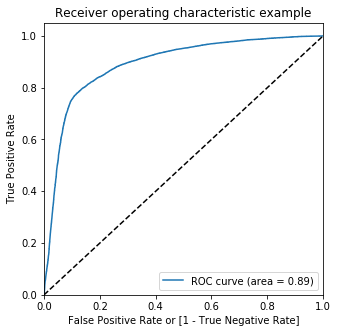

In [838]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

In [839]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Convert_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0          0      0.099455    1    0    0    0    0    0    0    0    0    0
1          0      0.760925    1    1    1    1    1    1    1    1    0    0
2          0      0.038794    1    0    0    0    0    0    0    0    0    0
3          0      0.003754    1    0    0    0    0    0    0    0    0    0
4          0      0.220279    1    1    1    0    0    0    0    0    0    0

In [840]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.666016  0.974611  0.357422
0.2   0.2  0.731101  0.950159  0.512044
0.3   0.3  0.775168  0.919879  0.630456
0.4   0.4  0.807398  0.885958  0.728838
0.5   0.5  0.823214  0.838458  0.807970
0.6   0.6  0.829978  0.791322  0.868633
0.7   0.7  0.817960  0.723063  0.912856
0.8   0.8  0.738541  0.528276  0.948806
0.9   0.9  0.591775  0.203579  0.979970


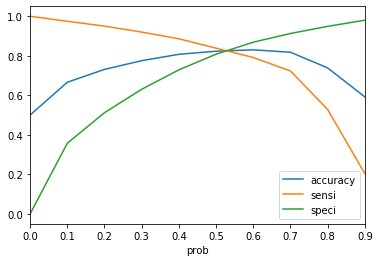

In [841]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [842]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.75 else 0)
y_train_pred_final.head()

Converted  Convert_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
0          0      0.099455    1    0    0    0    0    0    0    0    0    0   
1          0      0.760925    1    1    1    1    1    1    1    1    0    0   
2          0      0.038794    1    0    0    0    0    0    0    0    0    0   
3          0      0.003754    1    0    0    0    0    0    0    0    0    0   
4          0      0.220279    1    1    1    0    0    0    0    0    0    0   

   final_predicted  
0                0  
1                1  
2                0  
3                0  
4                0

In [843]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.6438790905780136

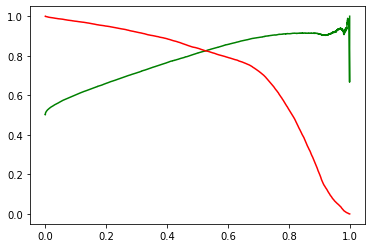

In [844]:
#Precion and recall tradeoff
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

In [845]:
##### Creating new column 'predicted Lead' with 1 if Churn_Prob > 0.7 else 0
y_train_pred_final['pred_conv'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.75 else 0)
y_train_pred_final.head(10)

Converted  Convert_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
0          0      0.099455    1    0    0    0    0    0    0    0    0    0   
1          0      0.760925    1    1    1    1    1    1    1    1    0    0   
2          0      0.038794    1    0    0    0    0    0    0    0    0    0   
3          0      0.003754    1    0    0    0    0    0    0    0    0    0   
4          0      0.220279    1    1    1    0    0    0    0    0    0    0   
5          0      0.016874    1    0    0    0    0    0    0    0    0    0   
6          1      0.892388    1    1    1    1    1    1    1    1    1    0   
7          0      0.138338    1    1    0    0    0    0    0    0    0    0   
8          0      0.025961    1    0    0    0    0    0    0    0    0    0   
9          1      0.927062    1    1    1    1    1    1    1    1    1    1   

   final_predicted  pred_conv  
0                0          0  
1                1          1  
2                0          0  
3                0          0  
4                0          0  
5                0          0  
6                1          1  
7                0          0  
8                0          0  
9                1          1

In [846]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)



0.7880703397325841

In [847]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion)

[[17919  1302]
 [ 6845 12376]]


In [848]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: \t\t\t{0:.2f}'.format( TP / float(TP+FN)))
# Let us calculate specificity
print('Specificity: \t\t\t{0:.2f}'.format(TN / float(TN+FP)))
# Calculate false postive rate - predicting  when convertion rate is fina;
print('False Positive Rate: \t\t{0:.2f}'.format( FP/ float(TN+FP)))
# positive predictive value 
print ('Positive Predictive Value: \t{0:.2f}'.format(TP / float(TP+FP)))
# Negative predictive value
print ('Negative Predictive Value: \t{0:.2f}'.format(TN / float(TN+ FN)))
#Precision Score
print('Precision Score:\t\t{0:.2f}'.format(precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)))
#Recall score
print('Recall Score:\t\t\t{0:.2f}'.format(recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)))

Sensitivity: 			0.64
Specificity: 			0.93
False Positive Rate: 		0.07
Positive Predictive Value: 	0.90
Negative Predictive Value: 	0.72
Precision Score:		0.90
Recall Score:			0.64


In [849]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.pred_conv))



0.7880703397325841


### Predicting on Test Set

In [850]:
X_test1 = X_test[col]
X_test1.head()

loc_og_mou_badphase  std_og_mou_badphase  loc_ic_mou_badphase  \
0            -0.235264             2.308217            -0.265125   
1            -0.743486            -0.575729            -0.774838   
2            -0.682722             1.106380            -0.702125   
3             0.675197            -0.575518             0.302407   
4            -0.742891             0.096335            -0.765234   

   loc_ic_t2f_mou_badphase  std_ic_mou_badphase  total_rech_num_badphase  \
0                -0.292931             0.115091                 0.706042   
1                -0.358942            -0.334665                -0.659261   
2                -0.324696            -0.186550                -0.449214   
3                -0.067848            -0.359668                -0.554238   
4                -0.358942             0.067142                 0.811065   

   last_day_rech_amt_till_8  onnet_mou_goodphase  offnet_mou_goodphase  \
0                  0.170249             0.089513              0.567165   
1                  0.969770            -0.688935             -0.837650   
2                 -0.668592            -0.154315              3.056823   
3                  0.183356            -0.007252             -0.270131   
4                 -0.340919            -0.312797              0.166192   

   loc_og_mou_goodphase  loc_ic_mou_goodphase  fb_user_8_1.0  
0             -0.533982             -0.518340      -0.703497  
1             -0.774439             -0.796719      -0.703497  
2             -0.700427             -0.750340      -0.703497  
3              0.787322              0.473938      -0.703497  
4             -0.773672             -0.821948      -0.703497

In [851]:
#adding constant and predicting
X_test_sm = sm.add_constant(X_test1)
y_test_pred = modres.predict(X_test_sm)
y_test_pred[:10]

0    0.181424
1    0.773411
2    0.934859
3    0.418359
4    0.749509
5    0.758091
6    0.699858
7    0.585214
8    0.009084
9    0.001550
dtype: float64

In [852]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

0
0  0.181424
1  0.773411
2  0.934859
3  0.418359
4  0.749509

In [853]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['mobile_number'] = test_mobilenum
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [854]:
y_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8998 entries, 0 to 8997
Data columns (total 2 columns):
Churn_val        8998 non-null int64
mobile_number    8998 non-null int64
dtypes: int64(2)
memory usage: 140.7 KB


In [855]:
# Concatenating y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()


Churn_val  mobile_number         0
0          0     7001033131  0.181424
1          0     7000373352  0.773411
2          0     7002079741  0.934859
3          0     7001647697  0.418359
4          0     7000016675  0.749509

In [856]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['mobile_number','Churn_val','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()


mobile_number  Churn_val  Churn_Prob
0     7001033131          0    0.181424
1     7000373352          0    0.773411
2     7002079741          0    0.934859
3     7001647697          0    0.418359
4     7000016675          0    0.749509

In [857]:
#converting probability to predicted Conversion
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.75 else 0)
y_pred_final.head()

mobile_number  Churn_val  Churn_Prob  final_predicted
0     7001033131          0    0.181424                0
1     7000373352          0    0.773411                1
2     7002079741          0    0.934859                1
3     7001647697          0    0.418359                0
4     7000016675          0    0.749509                0

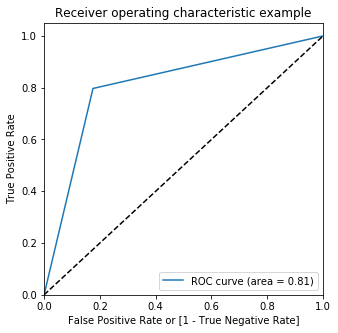

In [858]:
draw_roc(y_pred_final.Churn_val, y_pred_final.final_predicted)

In [859]:

#draw_roc(y_pred_final.Churn, y_pred_final.predicted)

"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.Churn_val, y_pred_final.Churn_Prob))

'0.87'

In [860]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn_val, y_pred_final.final_predicted)

0.8221827072682818

In [659]:
print('Precision Score:\t\t{0:.2f}'.format(precision_score(y_pred_final.Churn_val, y_pred_final.final_predicted)))
#Recall score

print('Recall Score:\t\t\t{0:.2f}'.format(recall_score(y_pred_final.Churn_val, y_pred_final.final_predicted)))

Precision Score:		0.30
Recall Score:			0.80


# Predictor Visualization

Text(0.5, 1.0, 'Negative Correlation with Churn')

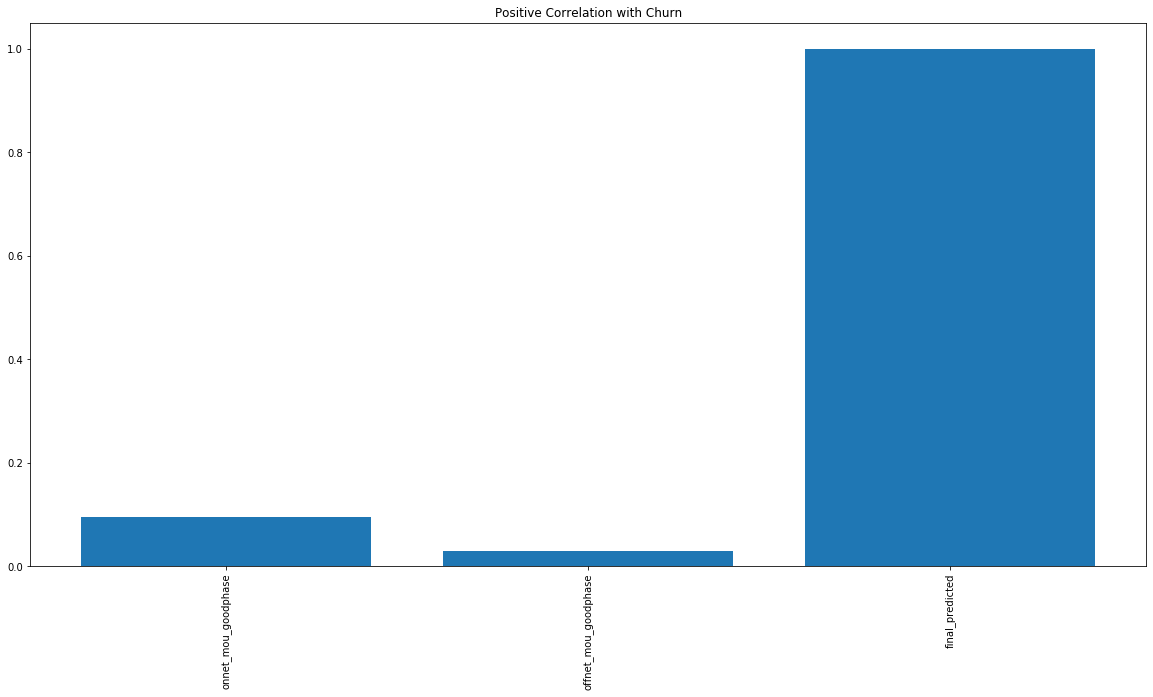

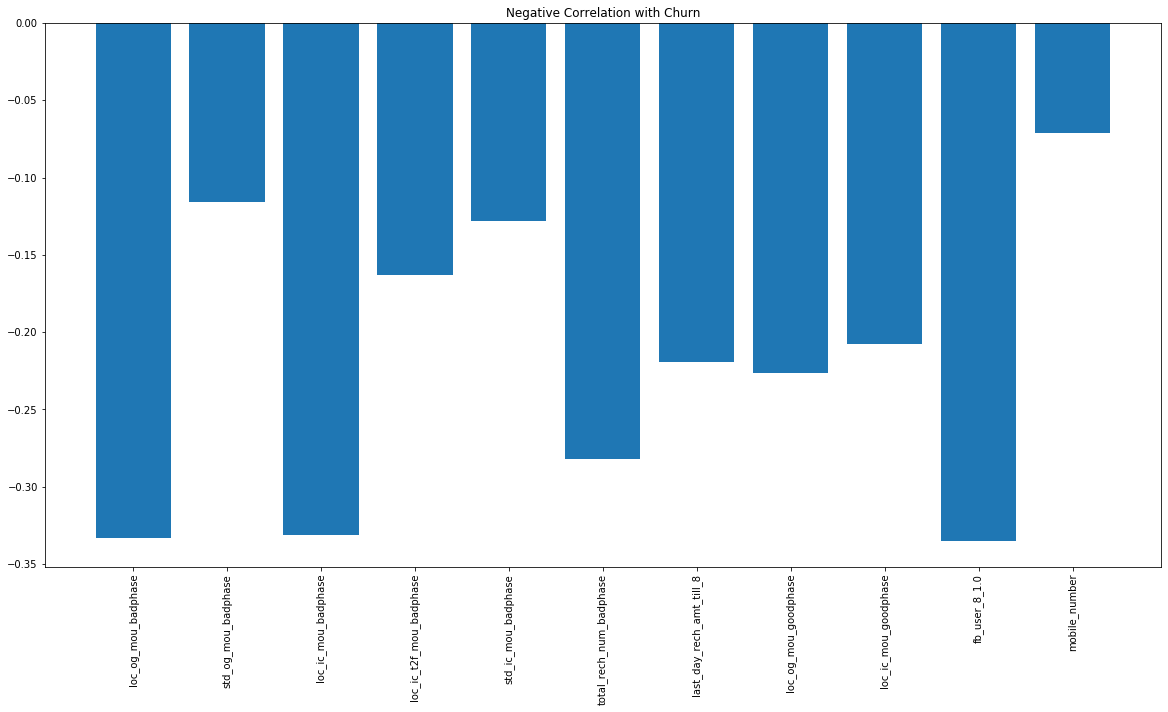

In [735]:
#Visualizing the predictor
#Visualizing the predictor
#Concatenate with original  data  with dummies
col1=col.copy()
col1.append('mobile_number')
ld_concat=pd.merge(df[col1],y_pred_final[['mobile_number','final_predicted']])

#plt.figure(figsize=(20,20))
#sns.heatmap(ld_concat.corr())
df1=pd.DataFrame(ld_concat.corrwith(ld_concat['final_predicted']))
df1.reset_index(inplace=True)
#df.sort_values()
#Positive correlation
plt.figure(figsize=(20,10))
plt.bar(x=df1[df1[0]>0]['index'],height=df1[df1[0]>0][0])
plt.xticks(rotation=90)
plt.title('Positive Correlation with Churn')
#Negative correlation
plt.figure(figsize=(20,10))
plt.bar(x=df1[df1[0]<0]['index'],height=df1[df1[0]<0][0])
plt.xticks(rotation=90)
plt.title('Negative Correlation with Churn')


### Hyperparameter Tuning 

In [660]:
# # Create regularization penalty space
# penalty = ['l1', 'l2']

# # Create regularization hyperparameter space
# C = np.logspace(0, 4, 20)

# # Create hyperparameter options
# hyperparameters = dict(C=C, penalty=penalty)

In [661]:
# # Create grid search using 5-fold cross validation
# clf = GridSearchCV(logm4, hyperparameters, cv=5, verbose=2,n_jobs=-1)

In [662]:
# # Fit grid search
# best_model = clf.fit(X_train_1, y_train_1)

In [663]:
# modelLookup('glm')

# Creating principle components

In [861]:
pca = PCA(svd_solver = 'randomized', random_state = 42)
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [862]:
len(X_train)

20993

In [863]:
#first component of the first vector obtained from pca.components_
pca.components_

array([[ 1.16589209e-02,  3.61489759e-03,  2.83731174e-02, ...,
         2.22464307e-01, -2.74358783e-01,  7.10579814e-02],
       [ 1.25480991e-02, -1.65811924e-03,  8.46213644e-02, ...,
         1.16533905e-01,  1.47024729e-01, -2.61818445e-01],
       [ 3.58404778e-02,  3.50775886e-02,  2.07465858e-01, ...,
        -8.81324388e-02, -8.10031000e-03,  9.60163197e-02],
       ...,
       [-0.00000000e+00,  1.39300751e-17, -9.29031213e-17, ...,
         2.94465711e-17, -1.80807934e-01, -2.66216547e-01],
       [-0.00000000e+00,  9.80023772e-18, -1.09062762e-16, ...,
        -1.58941431e-16, -1.70962848e-01, -2.51699404e-01],
       [-0.00000000e+00,  4.00232453e-19,  3.13227037e-18, ...,
         1.33372141e-17,  1.17463595e-16,  9.82274182e-17]])

In [864]:
len(pca.explained_variance_ratio_)

80

In [865]:
#Making a scree plot for the explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

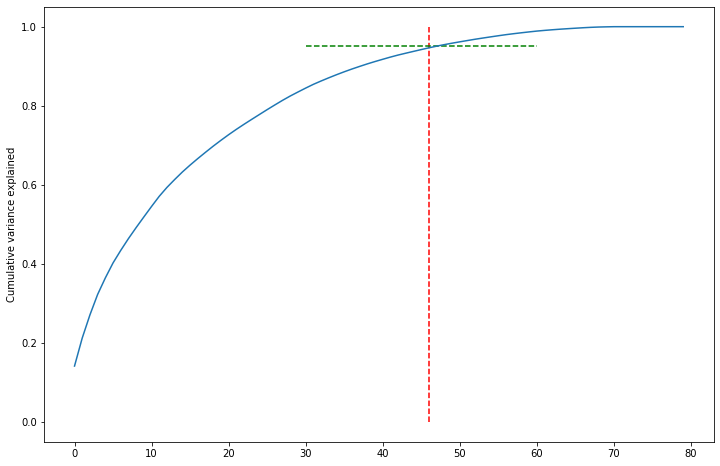

In [669]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=46, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=60, xmin=30, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Observation
95% variance is explained by number of components =46, hence choosing 46

In [670]:
pca_final = IncrementalPCA(n_components = 46)

In [671]:
print(len(X_train))
print(len(X_test))

20993
8998


In [672]:
X_train_1 = pca_final.fit_transform(X_train)
print(X_train.shape)
X_test_1= pca_final.transform(X_test)
print(X_test.shape)

(20993, 80)
(8998, 80)


In [673]:
PC_dict={}

# Create a dataframe with the PCs obtained
pc_train  = pd.DataFrame(X_train_1)
for i in range(0,46):
    PCA='PC'+str(i+1)
    #rint(PCA)
    PC_dict[PCA]=pc_train[i]
pca_train = pd.DataFrame(PC_dict)

In [674]:
# Check the head of the resultant data
pca_train.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.812835 -0.497949 -0.778155 -1.965023  1.514472  0.856835 -1.515326   
1 -3.217551  0.820946  0.481756 -0.225309 -1.210694  5.870981 -0.250490   
2 -1.337052  0.541463 -1.242362 -0.285766  1.002257  1.172632  0.192177   
3 -3.460766 -1.350651  0.503186 -2.406531  2.377342  0.706462 -1.026759   
4  3.706072 -0.452294 -1.269971  0.155490  1.211120  0.434128  0.398935   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.983795  0.697347 -1.882465  0.061822  0.547871 -0.349208  1.094975   
1  0.720664  4.532996 -0.959978 -3.593872 -2.917121 -5.223812  2.504969   
2  0.151521  0.349841  0.058650 -0.102927 -0.507039 -0.059474  0.157996   
3  0.941512  0.017341 -1.045096  0.888783 -0.355982  0.357366  1.871315   
4 -0.409887 -0.249926  1.028683 -0.973427 -0.634992 -1.252502  0.544016   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0 -0.901094  1.189457  0.410095  1.268293  0.052557 -0.634725 -1.687362   
1  1.461765  4.303370  3.326305 -3.114477  0.446736 -0.582887  8.148887   
2  0.523547 -0.634745 -0.401960 -0.485101 -0.103177 -0.637220 -0.476023   
3  0.052978 -0.041340 -0.380634  0.976424 -1.788710 -2.022532 -0.387874   
4 -0.498711  0.838619 -0.501812  0.989152  1.721230  1.039390 -0.989186   

       PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0  1.240489  1.501454 -0.025725 -0.315938  1.199790 -0.078333  0.145908   
1 -0.848600  0.003188 -0.124820  0.495043  1.424969 -1.681810  0.301781   
2  0.156126 -0.368596 -0.111810 -0.009962  0.483938  0.998851 -0.485823   
3 -0.614069  0.286354 -1.233159 -1.192183 -2.435159  0.400306  0.150110   
4  0.293332  0.082079 -0.988202  0.882005 -1.158760  0.614874 -0.697990   

       PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0 -0.615895  0.273027 -1.289503  0.358141  0.071741  0.219822  0.157671   
1 -0.933299  0.460340 -0.643659 -0.095029  0.149324  0.415098 -1.650912   
2 -0.193280 -0.121082 -0.991442 -0.060784 -0.589116  0.213348  0.152304   
3  1.184722  0.446708  0.437291 -1.820835 -0.217171 -0.584450  1.826655   
4  0.735763  0.774364  0.784866  0.693885  1.120666  0.080549  0.029030   

       PC36      PC37      PC38      PC39      PC40      PC41      PC42  \
0 -0.040626 -0.171481 -0.670565  0.291996 -0.086747  0.125477  0.012113   
1 -0.084926  0.044330 -1.586208 -1.547839 -0.052509 -0.880431 -1.649650   
2  0.370963  0.145573 -0.299034  0.841742  1.132973 -0.564671  0.419337   
3  0.691456 -0.236531 -0.510734  0.468289 -0.755597 -0.063433  0.090265   
4 -0.545308 -0.125914 -0.310030 -0.401716 -0.203646  0.255604 -0.174613   

       PC43      PC44      PC45      PC46  
0  0.254428 -0.797734 -0.248614  0.321391  
1  1.128116  0.781700  0.644379  0.517805  
2 -0.088599 -0.129280  0.111699  0.256015  
3 -0.509636 -0.347090 -0.274785 -0.665424  
4 -0.457733  0.055633 -0.007897  0.158505

In [675]:
PC_dict={}

# Create a dataframe with the PCs obtained
pc_train  = pd.DataFrame(X_test_1)
for i in range(0,46):
    PCA='PC'+str(i+1)
    #rint(PCA)
    PC_dict[PCA]=pc_train[i]
pca_test = pd.DataFrame(PC_dict)

# Model 2 - Logistic Regression with PCA

In [676]:
logreg=LogisticRegression(class_weight='balanced',random_state=100,solver='saga')
model_pca=logreg.fit(pca_train,y_train)


In [677]:
y_train_pred=model_pca.predict(pca_train)

### Evaluation on training set

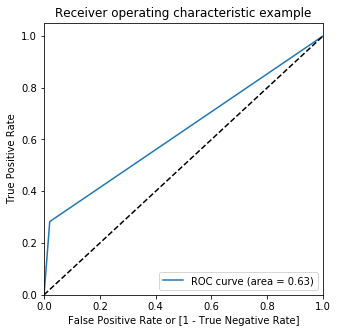

In [678]:
#ROC Curve
draw_roc(y_train_pred, y_train)

In [679]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred, y_train)

0.809507931215167

In [680]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred, y_train )
print(confusion)

[[15544   322]
 [ 3677  1450]]


In [681]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: \t\t\t{0:.2f}'.format( TP / float(TP+FN)))
# Let us calculate specificity
print('Specificity: \t\t\t{0:.2f}'.format(TN / float(TN+FP)))
# Calculate false postive rate - predicting  when convertion rate is fina;
print('False Positive Rate: \t\t{0:.2f}'.format( FP/ float(TN+FP)))
# positive predictive value 
print ('Positive Predictive Value: \t{0:.2f}'.format(TP / float(TP+FP)))
# Negative predictive value
print ('Negative Predictive Value: \t{0:.2f}'.format(TN / float(TN+ FN)))
#Precision Score
print('Precision Score:\t\t{0:.2f}'.format(precision_score(y_train_pred, y_train)))
#Recall score
print('Recall Score:\t\t\t{0:.2f}'.format(recall_score(y_train_pred, y_train)))


Sensitivity: 			0.28
Specificity: 			0.98
False Positive Rate: 		0.02
Positive Predictive Value: 	0.82
Negative Predictive Value: 	0.81
Precision Score:		0.82
Recall Score:			0.28


### Predicting on test set

In [682]:
y_pred=model_pca.predict(pca_test)

In [683]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred, y_test)

0.8055123360746833

In [684]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred, y_test )
print(confusion)

[[6584  154]
 [1596  664]]


In [685]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: \t\t\t{0:.2f}'.format( TP / float(TP+FN)))
# Let us calculate specificity
print('Specificity: \t\t\t{0:.2f}'.format(TN / float(TN+FP)))
# Calculate false postive rate - predicting  when convertion rate is fina;
print('False Positive Rate: \t\t{0:.2f}'.format( FP/ float(TN+FP)))
# positive predictive value 
print ('Positive Predictive Value: \t{0:.2f}'.format(TP / float(TP+FP)))
# Negative predictive value
print ('Negative Predictive Value: \t{0:.2f}'.format(TN / float(TN+ FN)))
#Precision Score
print('Precision Score:\t\t{0:.2f}'.format(precision_score(y_pred, y_test)))
#Recall score
print('Recall Score:\t\t\t{0:.2f}'.format(recall_score(y_pred, y_test)))


Sensitivity: 			0.29
Specificity: 			0.98
False Positive Rate: 		0.02
Positive Predictive Value: 	0.81
Negative Predictive Value: 	0.80
Precision Score:		0.81
Recall Score:			0.29


### Hyperparameter tuning using Gridsearch

In [686]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 20)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [687]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logreg, hyperparameters, cv=5, verbose=2,n_jobs=-1)

In [688]:
# Fit grid search
best_model = clf.fit(pca_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.8min finished


In [689]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
#print(best_model.best_estimator_.get_params())

Best Penalty: l1
Best C: 1.6237767391887217


In [690]:
y_pred=best_model.predict(pca_test)

In [691]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred, y_test)

0.8055123360746833

In [692]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred, y_test )
print(confusion)

[[6584  154]
 [1596  664]]


In [693]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: \t\t\t{0:.2f}'.format( TP / float(TP+FN)))
# Let us calculate specificity
print('Specificity: \t\t\t{0:.2f}'.format(TN / float(TN+FP)))
# Calculate false postive rate - predicting  when convertion rate is fina;
print('False Positive Rate: \t\t{0:.2f}'.format( FP/ float(TN+FP)))
# positive predictive value 
print ('Positive Predictive Value: \t{0:.2f}'.format(TP / float(TP+FP)))
# Negative predictive value
print ('Negative Predictive Value: \t{0:.2f}'.format(TN / float(TN+ FN)))
#Precision Score
print('Precision Score:\t\t{0:.2f}'.format(precision_score(y_pred, y_test)))
#Recall score
print('Recall Score:\t\t\t{0:.2f}'.format(recall_score(y_pred, y_test)))


Sensitivity: 			0.29
Specificity: 			0.98
False Positive Rate: 		0.02
Positive Predictive Value: 	0.81
Negative Predictive Value: 	0.80
Precision Score:		0.81
Recall Score:			0.29


# Random Forest with PCA

In [694]:
rfc = RandomForestClassifier(class_weight='balanced')

In [695]:
# fit
model_pca3=rfc.fit(pca_train, y_train)

In [696]:
model_pca3.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(class_weight='balanced')>

### Evaluation on train set

In [697]:
y_train_pred=rfc.predict(pca_train)

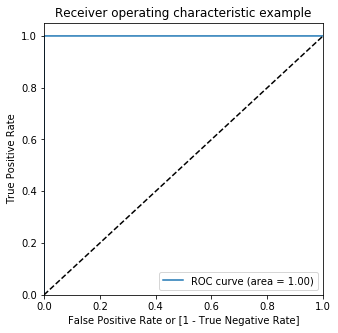

In [698]:
#ROC Curve
draw_roc(y_train_pred, y_train)

In [699]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred, y_train)

0.9999523650740723

In [700]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: \t\t\t{0:.2f}'.format( TP / float(TP+FN)))
# Let us calculate specificity
print('Specificity: \t\t\t{0:.2f}'.format(TN / float(TN+FP)))
# Calculate false postive rate - predicting  when convertion rate is fina;
print('False Positive Rate: \t\t{0:.2f}'.format( FP/ float(TN+FP)))
# positive predictive value 
print ('Positive Predictive Value: \t{0:.2f}'.format(TP / float(TP+FP)))
# Negative predictive value
print ('Negative Predictive Value: \t{0:.2f}'.format(TN / float(TN+ FN)))
#Precision Score
print('Precision Score:\t\t{0:.2f}'.format(precision_score(y_train_pred, y_train)))
#Recall score
print('Recall Score:\t\t\t{0:.2f}'.format(recall_score(y_train_pred, y_train)))


Sensitivity: 			0.29
Specificity: 			0.98
False Positive Rate: 		0.02
Positive Predictive Value: 	0.81
Negative Predictive Value: 	0.80
Precision Score:		1.00
Recall Score:			1.00


### Making prediction on test set

In [701]:
# rfc.score(pca_test,y_test)

In [702]:
# Making predictions
predictions = rfc.predict(pca_test)

In [703]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      8180
           1       0.63      0.15      0.24       818

    accuracy                           0.91      8998
   macro avg       0.77      0.57      0.60      8998
weighted avg       0.89      0.91      0.89      8998



In [704]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8108   72]
 [ 697  121]]


In [705]:
print(accuracy_score(y_test,predictions))

0.9145365636808179


In [706]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: \t\t\t{0:.2f}'.format( TP / float(TP+FN)))
# Let us calculate specificity
print('Specificity: \t\t\t{0:.2f}'.format(TN / float(TN+FP)))
# Calculate false postive rate - predicting  when convertion rate is fina;
print('False Positive Rate: \t\t{0:.2f}'.format( FP/ float(TN+FP)))
# positive predictive value 
print ('Positive Predictive Value: \t{0:.2f}'.format(TP / float(TP+FP)))
# Negative predictive value
print ('Negative Predictive Value: \t{0:.2f}'.format(TN / float(TN+ FN)))
#Precision Score
print('Precision Score:\t\t{0:.2f}'.format(precision_score(predictions, y_test)))
#Recall score
print('Recall Score:\t\t\t{0:.2f}'.format(recall_score(predictions, y_test)))


Sensitivity: 			0.29
Specificity: 			0.98
False Positive Rate: 		0.02
Positive Predictive Value: 	0.81
Negative Predictive Value: 	0.80
Precision Score:		0.15
Recall Score:			0.63


### Hyper parameter tuning

In [707]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = [int(x) for x in np.linspace(1, 46,num = 5)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10,num = 2)]
max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
               'max_depth': max_depth,
               }

In [708]:
# Create grid search using 5-fold cross validation
clf = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 5, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)


In [709]:
clf.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [1, 10, None],
                                        'max_features': [1, 12, 23, 34, 46],
                                        'n_estimators': [1, 12, 23, 34, 45, 56,
                                                         67, 78, 89, 100]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)>

- Kindly note that below runs for 6 minutes

In [ ]:
# Fit grid search
best_model = clf.fit(pca_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 16.9min


In [ ]:
# View best hyperparameters
# print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
# print('Best C:', best_model.best_estimator_.get_params()['C'])
print(best_model.best_estimator_.get_params()['max_depth'])
print(best_model.best_estimator_.get_params()['n_estimators'])


In [ ]:
y_pred=best_model.predict(pca_test)


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred, y_test)


In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred, y_test )
print(confusion)


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: \t\t\t{0:.2f}'.format( TP / float(TP+FN)))
# Let us calculate specificity
print('Specificity: \t\t\t{0:.2f}'.format(TN / float(TN+FP)))
# Calculate false postive rate - predicting  when convertion rate is fina;
print('False Positive Rate: \t\t{0:.2f}'.format( FP/ float(TN+FP)))
# positive predictive value 
print ('Positive Predictive Value: \t{0:.2f}'.format(TP / float(TP+FP)))
# Negative predictive value
print ('Negative Predictive Value: \t{0:.2f}'.format(TN / float(TN+ FN)))
#Precision Score
print('Precision Score:\t\t{0:.2f}'.format(precision_score(y_pred, y_test)))
#Recall score
print('Recall Score:\t\t\t{0:.2f}'.format(recall_score(y_pred, y_test)))


# Model 3- Decision Tree Classifier 

In [ ]:
dtreg=DecisionTreeClassifier(random_state=100,class_weight='balanced')

In [ ]:
model_dt=dtreg.fit(pca_train,y_train)

In [ ]:
model_dt.get_params

### Evaluation on train data

In [ ]:
y_train_pred=model_dt.predict(pca_train)
#ROC Curve
draw_roc(y_train_pred, y_train)


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred, y_train)

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred, y_train )
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: \t\t\t{0:.2f}'.format( TP / float(TP+FN)))
# Let us calculate specificity
print('Specificity: \t\t\t{0:.2f}'.format(TN / float(TN+FP)))
# Calculate false postive rate - predicting  when convertion rate is fina;
print('False Positive Rate: \t\t{0:.2f}'.format( FP/ float(TN+FP)))
# positive predictive value 
print ('Positive Predictive Value: \t{0:.2f}'.format(TP / float(TP+FP)))
# Negative predictive value
print ('Negative Predictive Value: \t{0:.2f}'.format(TN / float(TN+ FN)))
#Precision Score
print('Precision Score:\t\t{0:.2f}'.format(precision_score(y_train_pred, y_train )))
#Recall score
print('Recall Score:\t\t\t{0:.2f}'.format(recall_score(y_train_pred, y_train )))


### Making prediction on test data

In [ ]:
y_pred=model_dt.predict(pca_test)

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred, y_test)

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred, y_test )
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: \t\t\t{0:.2f}'.format( TP / float(TP+FN)))
# Let us calculate specificity
print('Specificity: \t\t\t{0:.2f}'.format(TN / float(TN+FP)))
# Calculate false postive rate - predicting  when convertion rate is fina;
print('False Positive Rate: \t\t{0:.2f}'.format( FP/ float(TN+FP)))
# positive predictive value 
print ('Positive Predictive Value: \t{0:.2f}'.format(TP / float(TP+FP)))
# Negative predictive value
print ('Negative Predictive Value: \t{0:.2f}'.format(TN / float(TN+ FN)))
#Precision Score
print('Precision Score:\t\t{0:.2f}'.format(precision_score(y_pred, y_test)))
#Recall score
print('Recall Score:\t\t\t{0:.2f}'.format(recall_score(y_pred, y_test)))


### Hyper parameter tuning

In [ ]:
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 20)]
# Number of features to consider at every split
max_features = [int(x) for x in np.linspace(1,40,num=8)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20,num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
# bootstrap = [True, False]
criterion=['gini','entropy']
#ccp_alpha=[x for x in np.arange(0, 0.3,0.05 )]

# Create the random grid
random_grid = {'max_features':max_features,
               'min_samples_split':min_samples_split,
               'max_depth': max_depth,
               'min_samples_leaf':min_samples_leaf,
               'criterion':criterion,
               #'ccp_alpha':ccp_alpha
               }

In [ ]:
# Create grid search using 5-fold cross validation
clf = RandomizedSearchCV(estimator=model_dt, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 5, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)


In [ ]:
# Fit grid search
best_model = clf.fit(pca_train, y_train)

In [ ]:
# View best hyperparameters
# print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
# print('Best C:', best_model.best_estimator_.get_params()['C'])
print(best_model.best_estimator_.get_params())


In [ ]:
y_pred=best_model.predict(pca_test)



In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred, y_test)


In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred, y_test )
print(confusion)


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: \t\t\t{0:.2f}'.format( TP / float(TP+FN)))
# Let us calculate specificity
print('Specificity: \t\t\t{0:.2f}'.format(TN / float(TN+FP)))
# Calculate false postive rate - predicting  when convertion rate is fina;
print('False Positive Rate: \t\t{0:.2f}'.format( FP/ float(TN+FP)))
# positive predictive value 
print ('Positive Predictive Value: \t{0:.2f}'.format(TP / float(TP+FP)))
# Negative predictive value
print ('Negative Predictive Value: \t{0:.2f}'.format(TN / float(TN+ FN)))
#Precision Score
print('Precision Score:\t\t{0:.2f}'.format(precision_score(y_pred, y_test)))
#Recall score
print('Recall Score:\t\t\t{0:.2f}'.format(recall_score(y_pred, y_test)))



Below are the metrices for Model
### Model 1  Logistic regression with RFE



-
### Model 1 -Test data set 
Accuracy             :0.82
Precision Score:		0.31
Recall Score:		    0.80


### Model 2 -PCA with Logictic regression


### Test data set before hyper parameter
Accuracy               0.8055123360746833
Precision Score:		0.81
Recall Score:			0.29

### After Hyperparameter
Precision Score:		0.81
Recall Score:			0.29
Accuracy                        0.81


### PCA with Random Forest
Before Hyper parameter 
Accuracy                        .91
Precision Score:		0.14
Recall Score:			0.58
 

### After Hyper parameter
Accuracy                        .91
Precision Score:		0.19
Recall Score:			0.61

### PCA with Decision Tree
Before Hyper parameter

Accuracy                        .88
Precision Score:		0.30
Recall Score:			0.34

### Considerations for a good model
- Sensitivity/Recall is important in our case as we would rather retain the top value customer  who is not going to chrun than predict a customer who is going to churn as non-churning. More the sensitivity the better.
- Precision/Positive predictive value is impaortant as we want to retain top value customers who are for sure churning. If non-churn is predicted as churn it is not an issue. More the value better.
- Recall is more important than precision here as we are indentifying churn customer so missing a single churn will have impact on business as the requirement was to indentify all churn customer correctly.
- Specifity is not as important as we are less concerned with how many non-churn are predicted correctly and how many non-churn are predicted as churn
- Logistic regression without PCA has a good accuracy but low precision and high recall . So it can be used for identifiying the churn influancing features.So in this case we will not loose any customer who may churn . So this is potentially good model for predicting Churn over other model.
- Logistic regression with PCA has a good Accuracy ,Precision and recall . So it can be used for predictiong churn customer 
- Random Forest with PCA and good accuracy but recall is good  . So in this case we will not loose any customer who may churn . So this is potentially good model for predicting Churn after  Logistic regression without PCA
- Decision Tree with PCA has a good accuracy but recall and precision  is less over other model . SO this will be the last choice 


### Below are the predictor variables and coefficient
◾loc_og_mou_badphase -1.3013
◾std_og_mou_badphase -0.7987
◾loc_ic_mou_badphase -0.9890
◾loc_ic_t2f_mou_badphase -0.4227
◾std_ic_mou_badphase -0.2824
◾total_rech_num_badphase -0.5461
◾last_day_rech_amt_till_8 -0.4276
◾onnet_mou_goodphase 0.5421
◾offnet_mou_goodphase 0.5000
◾loc_og_mou_goodphase -0.1159
◾loc_ic_mou_goodphase 0.4217
◾fb_user_8_1.0 -0.4714
- Focus on Customer which have high in good phase and low in bad phase for Local outgoing .
- Focus on the customer which has  loc_og_mou_badphase is less. May be cost is high for outgoing .So giving some promotions will help.
- Focus on the customer which has  std_og_mou_badphase is less. May be cost is high for STD.So giving some promotions will help.
-  If  recharge amount is reducing for specific customer from good phase to bad phase  then promotions should be given to them 
- If FB users pack usage is  reducing then promotion should be provided